# Proyecto

## Integrantes:
* ### Nicolás Esteban Niño Vega - 202324436


## Recolección de datos
Se trabaja con un conjunto de datos proporcionado por Xenital Soluciones en Ingeniería con registros de vuelos de vehículos aéreos no tripulados (drones) contando con información de la fecha y hora del vuelo, piloto, tiempo de vuelo, condiciones geográficas, especificaciones de la aeronave y de la batería al momento del despegue y del aterrizaje. El conjunto de datos origiginal contiene 3000 entradas de datos de la información previamente mencionada. Los datos son obtenidos de las aplicaciones utilizadas en los vuelos y posteriormente son almacenados en una base de datos de manera automática. Cada fila del dataset representa un vuelo con un dron y cada columna una característica del vuelo.

## Importación de librerías
En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [ ]:
#Importar librerías

import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import sklearn
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [ ]:
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 200) # Numero máximo de filas a mostar

## Cargue de datos
* La carga de los datos se realiza desde de un archivo CSV y se almacena en una estructuras de datos de Pandas conocida como dataframe.
* Se utiliza encoding UTF-8.
* El separador del archivo de los datos es ';'.

In [ ]:
df = pd.read_csv('./Flight_Report_17.csv', encoding = "UTF-8", sep = ',')
# Se elimina las columnas 'Unnamed' que pueden surgir en ciertas ocasiones
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

##Exploración y descripción básica de los datos

In [ ]:
# Dimensiones del dataframe
df.shape

(3000, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flight Date/Time            3000 non-null   object 
 1   Flight Title                7 non-null      object 
 2   Pilot-in-Command            3000 non-null   object 
 3   Takeoff Address             2860 non-null   object 
 4   Air Time                    3000 non-null   object 
 5   Air Seconds                 3000 non-null   int64  
 6   Above Sea Level (Meters)    2998 non-null   float64
 7   Drone Name                  2968 non-null   object 
 8   Drone Type                  3000 non-null   object 
 9   Flight App                  3000 non-null   object 
 10  Battery Name                3000 non-null   object 
 11  Bat Printed Serial          2961 non-null   object 
 12  Bat Internal Serial         952 non-null    object 
 13  Takeoff Bat %               3000 

En primera instancia se quiere entender los datos que proporciona la empresa:

Se compartieron datos de 3000 vuelos de Xenital, con 22 columnas, de las cuales 11 son de tipo numérico y el restante (11) son de tipo categórica.

A continuación se presenta una tabla con el resumen de las columnas del conjunto de datos a partir del diccionario de datos proporcionado por Xenital:

| Columna | Tipo de dato | Descripción |
| :-: | :-: | :-: |
| Flight Date/Time | Fecha | Fecha de inicio del vuelo |
| Flight Title | Texto | Nombre dado al vuelo |
| Pilot-in-Command | Texto | Nombre del piloto a cargo del vuelo |
| Takeoff Address | Texto | Dirección del despegue del vuelo |
| Air Time | Hora | Tiempo de vuelo en formato HH:MM:SS |
| Air Seconds | Número entero (int64)| Tiempo de vuelo en segundos |
| Above Sea Level (Meters) | Número real (float64) | Altitud de despegue en metros |
| Drone Name | Texto | Nombre del dron según identificación interna |
| Drone Type | Texto | Nombre del modelo estándar del dron |
| Flight App | Texto | Nombre de la aplicación utilizada para el vuelo |
| Battery Name | Texto | Nombre de la batería según identificación interna |
| Bat Printed Serial | Texto | Serial impreso de la batería (Identificador único) |
| Bat Internal Serial | Texto | Serial interno de la batería (Identificador único) |
| Takeoff Bat % | Número entero (int64) | Porcentaje de batería del dron al despegue |
| Takeoff mAh | Número real (float64) | Carga eléctrica de la batería al despegue en miliamperios-hora |
| Takeoff Volts | Número real (float64) | Voltaje de la batería al despegue en voltios |
| Landing Bat % | Número entero (int64) | Porcentaje de batería del dron al aterrizaje |
| Landing mAh | Número real (float64) | Carga eléctrica de la batería al aterrizaje en miliamperios-hora |
| Landing Volts | Número real (float64) | Voltaje de la batería al aterrizaje en voltios |
| Max Altitude (Meters) | Número real (float64) | Altura máxima relativa a la altitud de despegue en metros |
| Max Distance (Kilometers) | Número real (float64) | Distancia máxima alcanzada relativa al punto de despegue en kilómetros |
| Total Mileage (Kilometers) | Número real (float64) | Distancia total recorrida en kilómetros |



Teniendo en cuenta que las técnica de Machine Learning a utilizar será clasificación con el fin de:

* Predecir el nivel de consumo de la batería con el fin de identificar si el tipo de vuelo es de consumo bajo, medio o alto consumo para prever que no se agoten. (Clasificación)

Se consideran como relevantes para el modelo las siguientes variables:

* Pilot-in-Command: La experticia piloto es una variable influyente en las métricas de vuelo.
* Air Seconds: tiempo de vuelo el cual influye durectamente el consumo de batería
* Above Sea Level (Meters): Resulta relevante esta variable debido a que la presión atmosférica (debido a la altura) puede afectar significativament el desempeño del vuelo.
* Drone Type: El modelo del dron es la variable principal de los aspectos técnicos de la aeronave, ya que de el dependen el resto de variables (como batería y otros) por lo cual solo se mantiene esta variable basados en el aspecto técnico de que drones del mismo modelo utilizan la misma batería y cuentan con métricas de vuelo similares.
* Takeoff Bat %: Como variable referente a consumo de batería resulta relevante al modelo.
* Takeoff mAh: Como variable referente a consumo de batería resulta relevante al modelo.
* Takeoff Volts: Como variable referente a consumo de batería resulta relevante al modelo.
* Landing Bat %: Como variable referente a consumo de batería resulta relevante al modelo.
* Landing mAh: Como variable referente a consumo de batería resulta relevante al modelo.
* Landing Volts: Como variable referente a consumo de batería resulta relevante al modelo.
* Max Altitude (Meters): La altitud alcanzada es sin duda una variable relevante ya que al aumentar la altura del equipo o al no volar a una altura constante existe un gasto adicional de batería
* Total Mileage (Kilometers): La distancia total es directamente proporcional a la batería gastada, ya que a mayor movimiento de la aeronave, existe un mayor consumo de batería.

A continuación se previsualiza una muestra aleatoria de los datos:

In [ ]:
df.sample(10)

,Flight Date/Time,Flight Title,Pilot-in-Command,Takeoff Address,Air Time,Air Seconds,Above Sea Level (Meters),Drone Name,Drone Type,Flight App,Battery Name,Bat Printed Serial,Bat Internal Serial,Takeoff Bat %,Takeoff mAh,Takeoff Volts,Landing Bat %,Landing mAh,Landing Volts,Max Altitude (Meters),Max Distance (Kilometers),Total Mileage (Kilometers)
2957,15-07-2017 10:27:37,NaN,Sebastian Uribe Sanabria,"Unnamed Road, Buenaventura, Valle del Cauca, C...",00:00:00,0,38.6,X002,Phantom 3 Advanced,DJI Go,XENITAL 5,6171160622913,18516/3610,98,4189.0,17.062,98,4189.0,16.948,0.0,0.0,0.0
2096,16-11-2018 12:52:59,NaN,Alejandro Becerra,"Unnamed Road, Chía, Cundinamarca, Colombia",00:00:17,17,2594.2,X003 (THOMAS DRONE),Phantom 3 Advanced,DJI Go,XENITAL 4 (ANTIGUA 19),1153063717,18192/1667,54,2190.0,15.327,53,2149.0,15.206,9.4,0.0,0.0
241,21-10-2020 11:21:24,NaN,Camilo Lopez,"Cra. 1 ##19-61 a 19-1, Bogotá, Colombia",00:02:39,159,2629.6,NaN,Mavic Air 2,DJI Fly,Bat-MavicAir2-A104B1,1Z3PH49EA104B1,NaN,75,2450.0,12.059,65,2126.0,11.477,50.2,0.1,0.1
462,30-09-2020 16:10:40,NaN,Alejandro Becerra,"45A, Piedecuesta, Santander, Colombia",00:04:41,281,543.7,4. XENITAL Phantom 4,Phantom 4,Litchi,Battery #29,082AD7F031082P,NaN,37,1949.0,14.727,16,843.0,14.378,10.3,0.1,0.2
518,28-09-2020 13:36:14,NaN,Alejandro Becerra,"45A, Puente Nacional, Santander, Colombia",00:02:28,148,2513.7,4. XENITAL Phantom 4,Phantom 4,Litchi,Battery #29,082AD7F031082P,NaN,21,1056.0,14.243,7,369.0,14.055,25.4,0.0,0.1
486,29-09-2020 14:52:41,NaN,Camilo Lopez,"45A, Suaita, Santander, Colombia",00:10:49,649,1450.0,Xenital - Air 2,Mavic Air 2,DJI Fly,Bat-MavicAir2-A106KF,1Z3PH49EA106KF,NaN,100,NaN,13.032,65,NaN,11.832,20.1,0.1,0.3
2398,08-08-2018 11:36:26,NaN,Sebastian Uribe Sanabria,"Cl. 11 #5-60, Bogotá, Colombia",00:10:12,612,2620.3,XENITAL PIOLIN1,Spark,DJI Go,SPARK 24,0C0AE87B3201VS,NaN,95,NaN,12.745,10,NaN,10.785,101.1,0.1,0.6
1046,17-12-2019 12:30:18,NaN,Sebastian Uribe Sanabria,"Troncal del Caribe, Sitionuevo, Magdalena, Col...",00:06:34,394,1.6,1. XENITAL Phantom 3 Adv,Phantom 3 Advanced,DJI Go,Battery #30,082AD7F03107T4,NaN,38,1947.0,15.138,10,512.0,14.451,80.3,0.1,0.8
2619,07-04-2018 10:34:23,NaN,Sebastian Uribe Sanabria,"Anolaima - La Florida, Cachipay, Cundinamarca,...",00:14:58,898,1736.0,X003 (THOMAS DRONE),Phantom 3 Advanced,DJI Go,XENITAL 9,6171160622356,18512/1013,97,4092.0,16.993,22,928.0,14.129,87.1,1.4,3.6
482,30-09-2020 05:59:05,NaN,Camilo Lopez,"45A, Oiba, Santander, Colombia",00:26:19,1579,1364.5,Xenital - Air 2,Mavic Air 2,DJI Fly,Bat-MavicAir2-A104B1,1Z3PH49EA104B1,NaN,100,NaN,12.813,10,NaN,10.926,45.8,0.1,1.6


## Entendimiento de los datos:
A continuación se genera una serie de procedimeintos con el fin de poder entender el conjunto de datos de estudio.

En este notebook se abordan dos aspectos importantes para el entendimiento de un conjunto de datos, buscando responder a las necesidades de una empresa en términos de análisis de información:

* Perfilamiento de datos
    * Columnas Numéricas (Análisis univariado)
    * Columnas Categóricas (Análisis univariado)
    * Análisis bivariado y multivariado
<br>
* Calidad de datos e ideas de preparación
  * Completitud
  * Unicidad / Duplicidad

###Perfilamiento de datos
Previo al perfilamiento de datos, se realizará la única modificación al dataset de este notebook, que será eliminar las variables que no serán relevantes para los análisis. Las columnas a mantener y la razón detrás de esto se expusieron en la sección (Exploración y sescripción básica de los satos).

In [ ]:
df = df[['Pilot-in-Command', 'Air Seconds', 'Above Sea Level (Meters)', 'Drone Type', 'Takeoff Bat %', 'Takeoff mAh', 'Takeoff Volts', 'Landing Bat %', 'Landing mAh', 'Landing Volts', 'Max Altitude (Meters)', 'Total Mileage (Kilometers)']]

In [ ]:
df.sample(10)

,Pilot-in-Command,Air Seconds,Above Sea Level (Meters),Drone Type,Takeoff Bat %,Takeoff mAh,Takeoff Volts,Landing Bat %,Landing mAh,Landing Volts,Max Altitude (Meters),Total Mileage (Kilometers)
2214,Sebastian Uribe Sanabria,769,23.3,Spark,99,NaN,12.774,16,NaN,10.836,33.4,0.5
1433,Sebastian Uribe Sanabria,965,1523.2,Phantom 3 Advanced,100,4080.0,17.136,12,489.0,13.962,83.5,8.3
255,Sebastian Uribe Sanabria,279,2587.4,Phantom 3 Professional,97,4062.0,16.982,75,3141.0,15.449,35.6,1.2
1093,Sebastian Uribe Sanabria,938,1.0,Phantom 3 Advanced,96,3931.0,17.017,18,737.0,14.292,99.7,4.8
2843,Sebastian Uribe Sanabria,846,350.4,Phantom 3 Advanced,97,4131.0,17.012,12,511.0,13.929,196.4,9.9
224,Alejandro Becerra,768,2193.8,Mavic Air 2,96,3219.0,12.618,53,1766.0,11.472,133.2,2.1
1457,Sebastian Uribe Sanabria,946,492.0,Phantom 3 Advanced,100,4348.0,17.195,16,695.0,14.138,81.8,9.9
1439,Sebastian Uribe Sanabria,39,1856.4,Phantom 3 Advanced,100,4117.0,17.045,96,3952.0,15.366,104.7,0.0
46,Sebastian Uribe Sanabria,1366,6.2,Phantom 4,99,4995.0,17.065,10,504.0,14.485,149.2,12.9
699,Alejandro Becerra,738,2631.7,Mavic Mini,97,1762.0,8.161,32,573.0,7.072,52.3,2.2


A continuación se presenta el tipo de dato asociado a cada columna del set de datos junto con su cuenta de no-nulos:

In [ ]:
# Impresión del tipo de dato asociado a cada columna y su cuenta de no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pilot-in-Command            3000 non-null   object 
 1   Air Seconds                 3000 non-null   int64  
 2   Above Sea Level (Meters)    2998 non-null   float64
 3   Drone Type                  3000 non-null   object 
 4   Takeoff Bat %               3000 non-null   int64  
 5   Takeoff mAh                 1923 non-null   float64
 6   Takeoff Volts               2939 non-null   float64
 7   Landing Bat %               3000 non-null   int64  
 8   Landing mAh                 1923 non-null   float64
 9   Landing Volts               2939 non-null   float64
 10  Max Altitude (Meters)       3000 non-null   float64
 11  Total Mileage (Kilometers)  3000 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 281.4+ KB


In [ ]:
# ¿Hay ausencias?
df.isna().sum()/len(df)

Pilot-in-Command              0.000000
Air Seconds                   0.000000
Above Sea Level (Meters)      0.000667
Drone Type                    0.000000
Takeoff Bat %                 0.000000
Takeoff mAh                   0.359000
Takeoff Volts                 0.020333
Landing Bat %                 0.000000
Landing mAh                   0.359000
Landing Volts                 0.020333
Max Altitude (Meters)         0.000000
Total Mileage (Kilometers)    0.000000
dtype: float64

En primera instancia vemos que todos los tipos concuerdan con tipo esperado y expuesto en el diccionario de datos. Por otro lado, se divisan problemas de completitud con las columnas Takeoff mAh y Landing mAh (en un 35.9% para ambas), Takeoff Volts y Landing Volts (en un 2.03% para ambas) y en Above Sea Level (Meters) con 0.067%.

####Columnas Numéricas

Las columnas numéricas del conjunto de datos son:

| Columna | Tipo de dato | Descripción | Valores posibles |
| :-: | :-: | :-: | :-: |
| Air Seconds | Número entero | Tiempo de vuelo en segundos | Enteros positivos (int64) |
| Above Sea Level (Meters) | Número real | Altitud de despegue en metros | Reales positivos (float64) |
| Takeoff Bat % | Número entero | Porcentaje de batería del dron al despegue | [0, 100] (int64) |
| Takeoff mAh | Número real | Carga eléctrica de la batería al despegue en miliamperios-hora | Reales positivos (float64) |
| Takeoff Volts | Número real | Voltaje de la batería al despegue en voltios | Reales positivos (float64) |
| Landing Bat % | Número entero | Porcentaje de batería del dron al aterrizaje | [0, 100] (int64) |
| Landing mAh | Número real | Carga eléctrica de la batería al aterrizaje en miliamperios-hora | Reales positivos (float64) |
| Landing Volts | Número real | Voltaje de la batería al aterrizaje en voltios | Reales positivos (float64) |
| Max Altitude (Meters) | Número real | Altura máxima relativa a la altitud de despegue en metros | Reales positivos (float64) |
| Total Mileage (Kilometers) | Número real | Distancia total recorrida en kilómetros | Reales positivos (float64) |

Las columnas numéricas del conjunto de datos son:

| Columna | Tipo de dato | Descripción | Valores posibles |
| :-: | :-: | :-: | :-: |
| Above Sea Level (Meters) | Número real | Altitud de despegue en metros | Reales positivos (float64) |
| Takeoff Bat % | Número entero | Porcentaje de batería del dron al despegue | [0, 100] (int64) |
| Takeoff mAh | Número real | Carga eléctrica de la batería al despegue en miliamperios-hora | Reales positivos (float64) |
| Takeoff Volts | Número real | Voltaje de la batería al despegue en voltios | Reales positivos (float64) |
| Max Altitude (Meters) | Número real | Altura máxima relativa a la altitud de despegue en metros | Reales positivos (float64) |
| Total Mileage (Kilometers) | Número real | Distancia total recorrida en kilómetros | Reales positivos (float64) |
| Pilot-in-Command | Texto | Nombre del piloto a cargo del vuelo | Cadenas de caracteres (object) |
| Dron Type | Texto | Tipo de dron utilizado | Cadenas de caracteres (object) |

#####Air Seconds
Esta columna indica el tiempo de vuelo en segundos.

In [ ]:
df["Air Seconds"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    3000.000000
mean      576.753667
std       410.008232
min         0.000000
5%          0.000000
25%       203.000000
50%       606.500000
75%       868.000000
95%      1285.050000
max      2033.000000
Name: Air Seconds, dtype: float64

[]

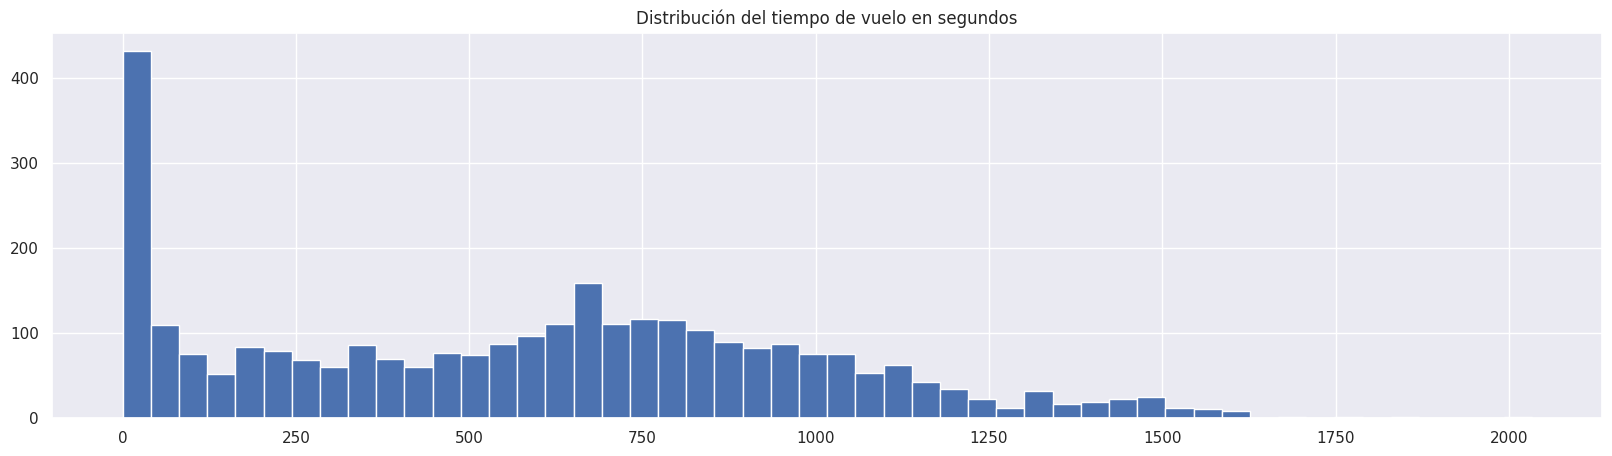

In [ ]:
plt.figure(figsize=(20, 5))
plt.hist(df["Air Seconds"], bins=50)
plt.title("Distribución del tiempo de vuelo en segundos")
plt.plot()

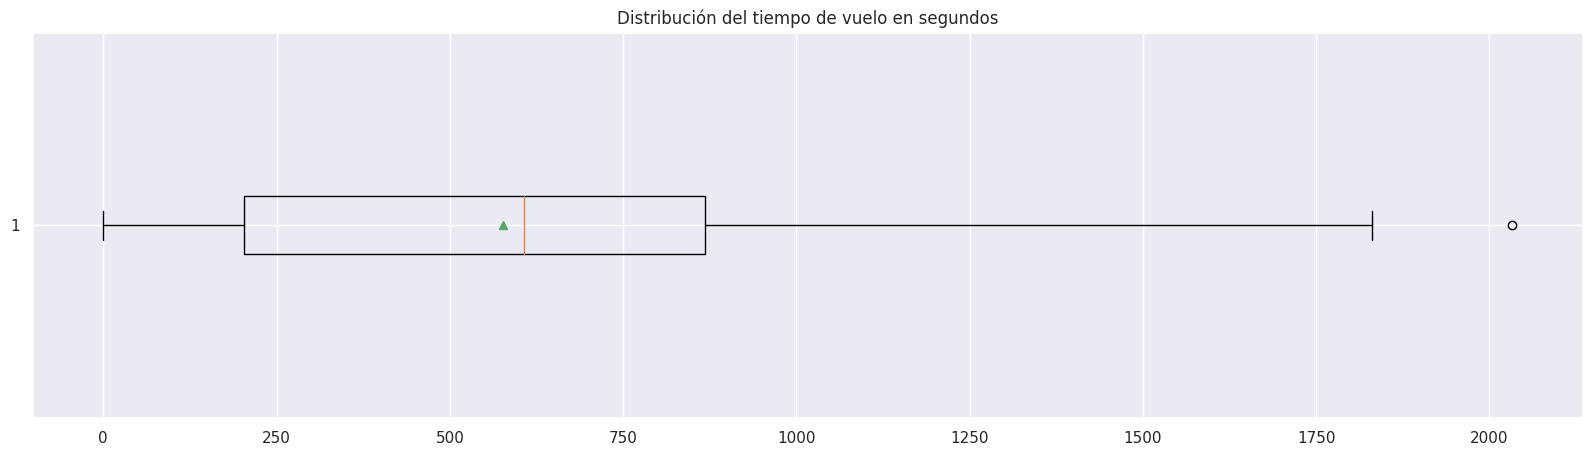

In [ ]:
plt.figure(figsize=(20, 5))
plt.boxplot(df["Air Seconds"], showmeans=True, vert=False)
plt.title("Distribución del tiempo de vuelo en segundos")
plt.show()

A partir del histograma de distribución y del diagrama de cajas y bigotes, se observa que no existen outliers considerables para esta variable. Sin embargo se debe tener en cuenta, que existe una cantidad considerable de vuelos que cuentan con 0 segundos de vuelo. Lo que significa que nunca despegaron. Procedemos a contar el número exacto de estos registros.

In [ ]:
zeros_count = (df['Air Seconds'] == 0).sum()
zeros_percentage = zeros_count/len(df)
print("Número de entradas con 0 segundos de vuelo:", zeros_count)
print("Porcentaje de entradas con 0 segundos de vuelo:", zeros_percentage)

Número de entradas con 0 segundos de vuelo: 263
Porcentaje de entradas con 0 segundos de vuelo: 0.08766666666666667


Vemos que el 8.767% de las entradas del dataset corresponde a vuelos en los que el dron nunca despegó. Por lo cual en etapas posteriores se debe tomar una decisión conjunta con el cliente de que realizar con estas entradas.

#####Above Sea Level (Meters)
Esta columna indica la altitud (en metros) sobre el nivel del mar a la que se inició el vuelo.

Debido al análisis anterior nos dimos cuenta que esta columna tiene nulos (exactamente 2) y no es objetivo de esta entrega modificar el dataframe. Para el perfilamiento de esta columna se trabajará con un dataframe modificado (donde se habrán eliminado las dos entradas con la variable en cuestión en nula). Esto con el fin de no contar con problemas al momento de graficar.

In [ ]:
mod_asl_df = df.dropna(subset=['Above Sea Level (Meters)'])

In [ ]:
mod_asl_df["Above Sea Level (Meters)"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    2998.000000
mean     1653.843496
std      1083.104118
min         0.000000
5%          1.000000
25%       350.425000
50%      2503.600000
75%      2620.300000
95%      2646.900000
max      3267.800000
Name: Above Sea Level (Meters), dtype: float64

[]

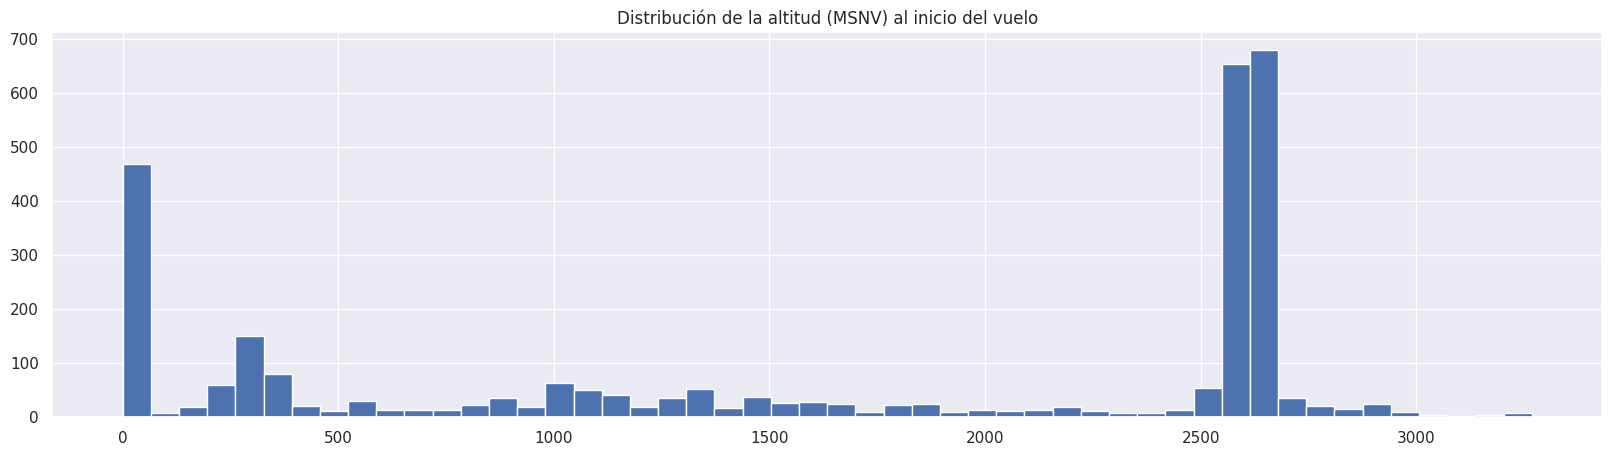

In [ ]:
plt.figure(figsize=(20, 5))
plt.hist(mod_asl_df["Above Sea Level (Meters)"], bins=50)
plt.title("Distribución de la altitud (MSNV) al inicio del vuelo")
plt.plot()

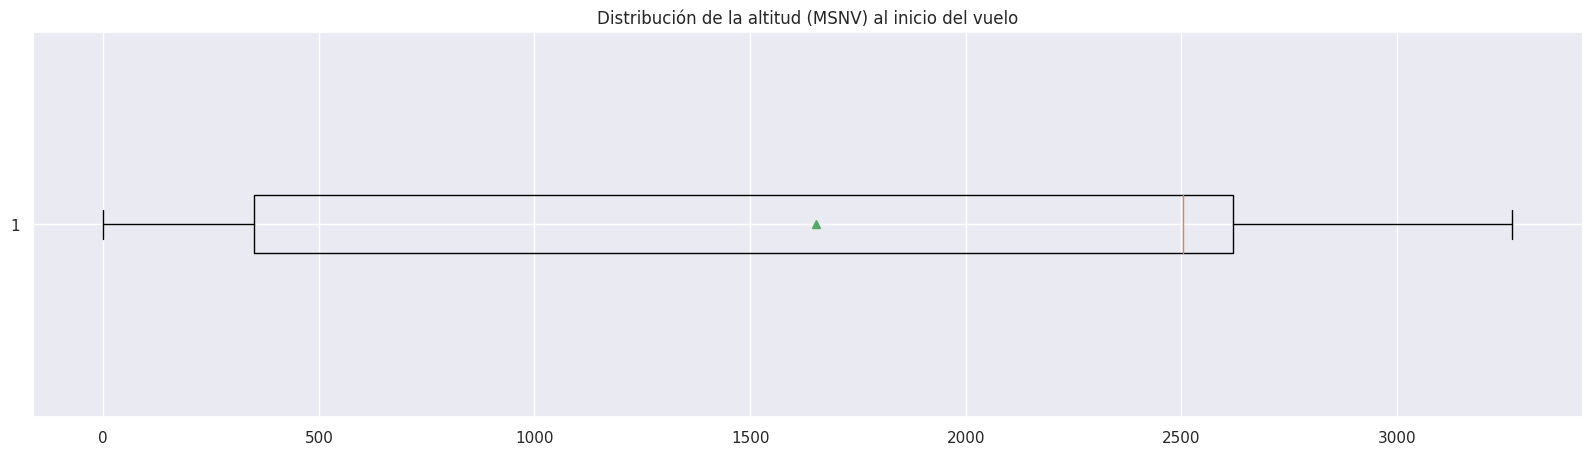

In [ ]:
plt.figure(figsize=(20, 5))
plt.boxplot(mod_asl_df["Above Sea Level (Meters)"], showmeans=True, vert=False)
plt.title("Distribución de la altitud (MSNV) al inicio del vuelo")
plt.show()

Además de el problema leve de completitud descrito anteriormente (2 entradas nulas) no existen outliers o problemas de consistencia en esta variable numérica. Todos las entradas cuentan con valores que tienen sentido.

####Takeoff Bat % & Landing Bat %
Estas variables hacen referencia al porcentaje de batería al despege (Takeoff) y aterrizaje (Landing)

In [ ]:
df["Takeoff Bat %"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    3000.000000
mean       87.614667
std        18.918901
min        12.000000
5%         43.000000
25%        85.000000
50%        97.000000
75%        99.000000
95%       100.000000
max       100.000000
Name: Takeoff Bat %, dtype: float64

In [ ]:
df["Landing Bat %"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    3000.000000
mean       39.602333
std        29.898096
min         1.000000
5%          9.000000
25%        14.000000
50%        26.000000
75%        64.000000
95%        96.000000
max       100.000000
Name: Landing Bat %, dtype: float64

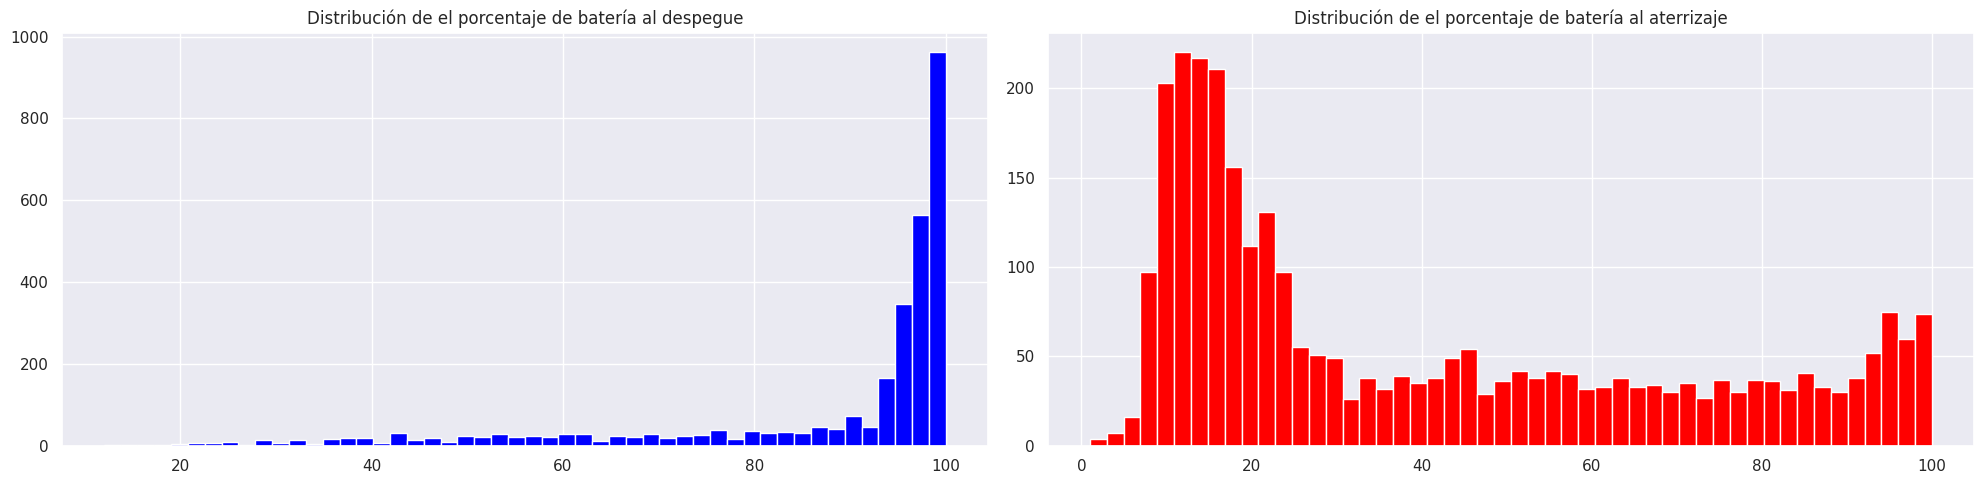

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.hist(df["Takeoff Bat %"], bins=50, color="blue")
ax1.set_title("Distribución de el porcentaje de batería al despegue")
ax2.hist(df["Landing Bat %"], bins=50, color="red")
ax2.set_title("Distribución de el porcentaje de batería al aterrizaje")

plt.tight_layout()
plt.show()

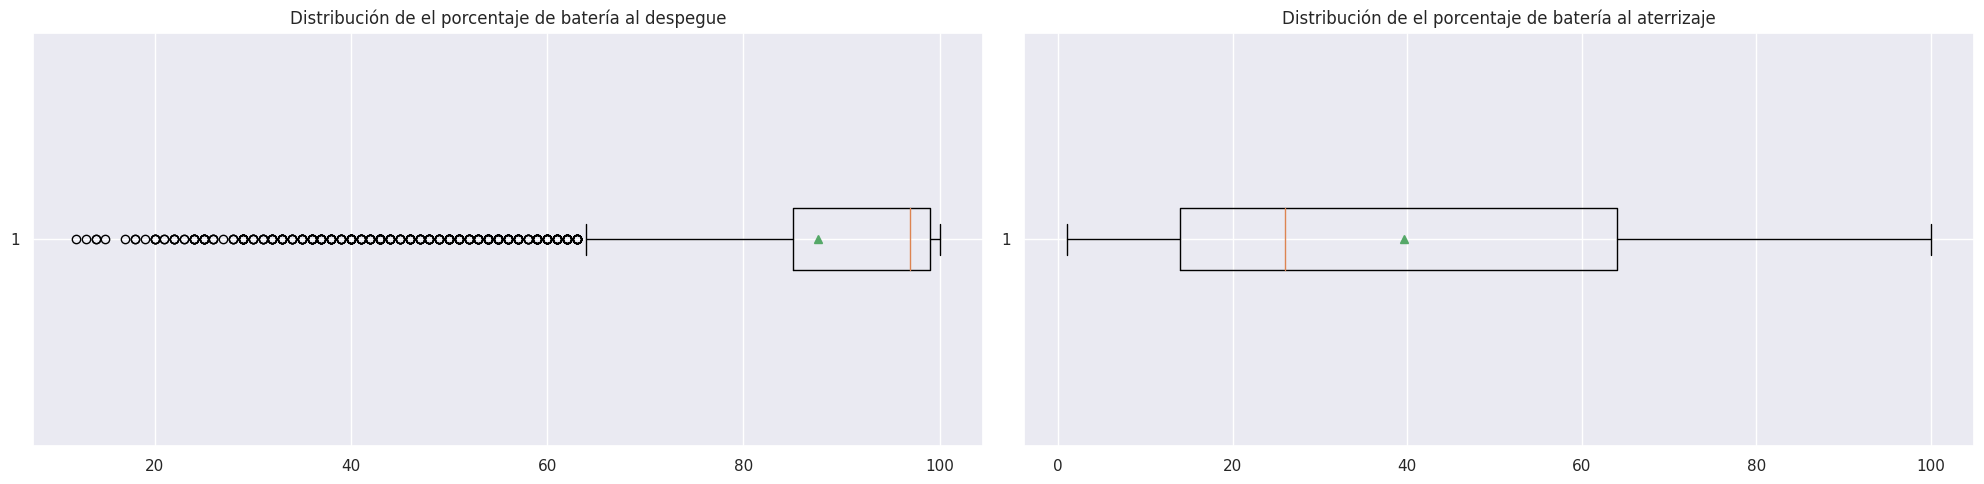

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.boxplot(df["Takeoff Bat %"], showmeans=True, vert=False)
ax1.set_title("Distribución de el porcentaje de batería al despegue")
ax2.boxplot(df["Landing Bat %"], showmeans=True, vert=False)
ax2.set_title("Distribución de el porcentaje de batería al aterrizaje")

plt.tight_layout()
plt.show()

A partir de los histogramas de distribución y de los diagramas de caja y bigotes observamos que estas variables no cuentan con problemas de consistencia (ya que todos los valores se encuentran entre 0 y 100). Además de ello, los valores cuentan con sentido, ya que en el caso de el despegue, los porcentajes de bateria se encuentran más distribuidos hacia el 100%, mientras que para el caso del aterrizaje, con algunas excepciones, se encuentran mayoritariamente distribuidos de la media de los datos hacia abajo.

####Takeoff mAh & Landing mAh
Estas variables hacen referencia a las cargas eléctricas de la batería al despegue y aterrizaje en miliamperios-hora.

A partir de análisis anteriores sabemos que estas variables tienen un 35.9% de entradas nulas. Como primeramente estamos identificando problemas , procederemos a trabajar con un dataframe modificado eliminando las entradas donde estas variables sean nulas. De esta manera podremos visualizar correctamente su comportamiento.

In [ ]:
mod_mah_df = df.dropna(subset=['Takeoff mAh', 'Landing mAh'])

In [ ]:
mod_mah_df["Takeoff mAh"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count     1923.000000
mean      3516.773271
std       1160.948575
min         -1.000000
5%        1282.000000
25%       2953.500000
50%       3744.000000
75%       4119.500000
95%       5182.900000
max      16715.000000
Name: Takeoff mAh, dtype: float64

In [ ]:
mod_mah_df["Landing mAh"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count     1923.000000
mean      1634.047322
std       1331.681080
min         -1.000000
5%         326.100000
25%        612.500000
50%       1069.000000
75%       2488.000000
95%       4127.300000
max      16715.000000
Name: Landing mAh, dtype: float64

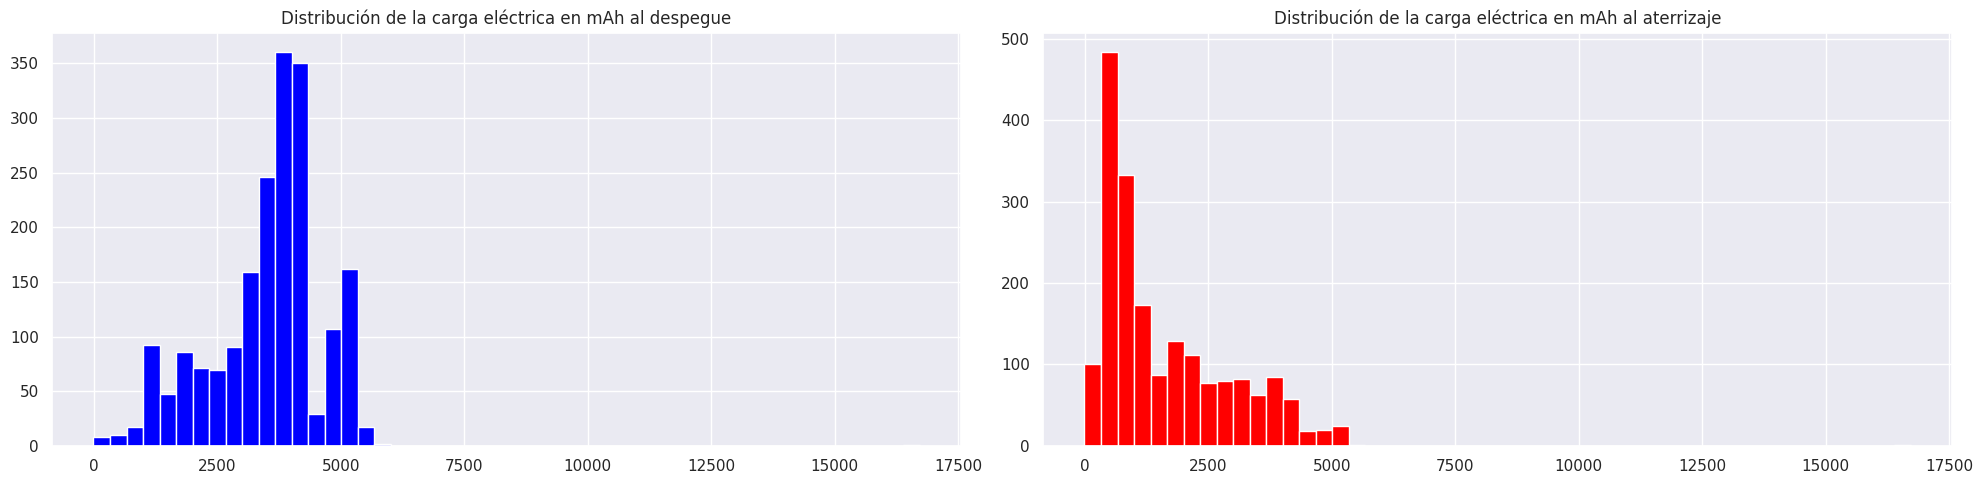

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.hist(mod_mah_df["Takeoff mAh"], bins=50, color="blue")
ax1.set_title("Distribución de la carga eléctrica en mAh al despegue")
ax2.hist(mod_mah_df["Landing mAh"], bins=50, color="red")
ax2.set_title("Distribución de la carga eléctrica en mAh al aterrizaje")

plt.tight_layout()
plt.show()

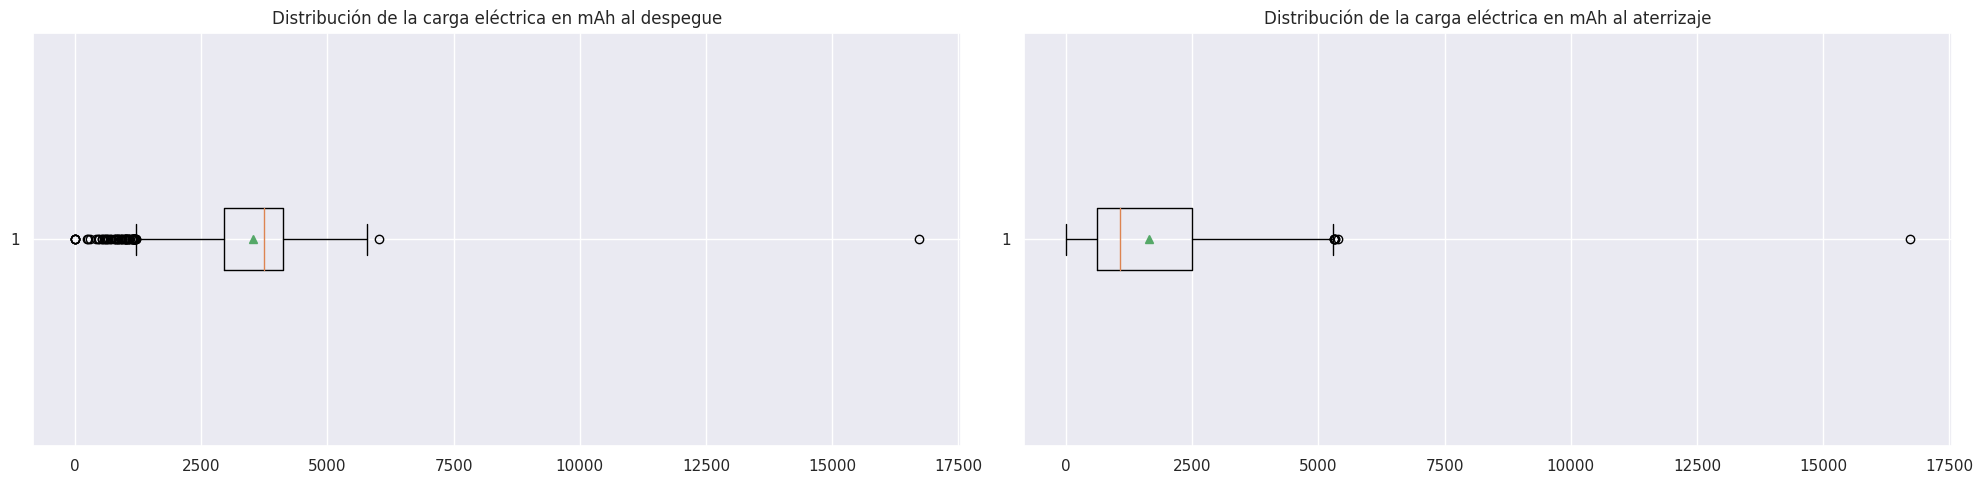

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.boxplot(mod_mah_df["Takeoff mAh"], showmeans=True, vert=False)
ax1.set_title("Distribución de la carga eléctrica en mAh al despegue")
ax2.boxplot(mod_mah_df["Landing mAh"], showmeans=True, vert=False)
ax2.set_title("Distribución de la carga eléctrica en mAh al aterrizaje")

plt.tight_layout()
plt.show()

Claramente el problema principal con estas variables vienen siendo su cantidad de nulos (35.9%) para ambas variables. Verificamos primero si las entradas que cuentan con Takeoff mAh en nulo, son las mismas con Landing mAh en nulo.

In [ ]:
df[(df['Takeoff mAh'].isna()) & (df['Landing mAh'].isna())].shape[0]/len(df)

0.359

Vemos que efectivamente, en las entradas con problemas de completitud con una de estas variables, también tiene problemas de completitud con la otra.

Respecto a el análisis de outliers, en ambas variables existe un dato máximo con valor en 16715. Procedemos a verificar esta entrada.

In [ ]:
df[(df['Takeoff mAh'] == 16715) & (df['Landing mAh'] == 16715)]

,Pilot-in-Command,Air Seconds,Above Sea Level (Meters),Drone Type,Takeoff Bat %,Takeoff mAh,Takeoff Volts,Landing Bat %,Landing mAh,Landing Volts,Max Altitude (Meters),Total Mileage (Kilometers)
2551,Sebastian Uribe Sanabria,103,2641.2,Spark,99,16715.0,24.832,87,16715.0,24.832,10.9,0.0


Consultando con Xenital y según datos de internet respecto al dron Spark, no es posible que cuente con esta cantidad de mAh, ya que su batería tiene una capacidad de 1480 mAh. El cual va a ser intervenido en la etapa de limpieza de datos

Se observa también que el valor mínimo de ambos Takeoff mAh y Landing mAh es de -1. Lo que no es confome con el diccionario de datos. Procedemos a verificar estas entradas:

In [ ]:
df[(df['Takeoff mAh'] == -1) | (df['Landing mAh'] == -1)]

,Pilot-in-Command,Air Seconds,Above Sea Level (Meters),Drone Type,Takeoff Bat %,Takeoff mAh,Takeoff Volts,Landing Bat %,Landing mAh,Landing Volts,Max Altitude (Meters),Total Mileage (Kilometers)
112,Sebastian Uribe Sanabria,0,2555.7,Matrice 210 RTK,63,-1.0,23.724,49,-1.0,23.039,2446.7,0.5
114,Sebastian Uribe Sanabria,6,2555.4,Matrice 210 RTK,64,-1.0,23.663,63,-1.0,23.559,1.1,0.8
116,Sebastian Uribe Sanabria,1,2555.5,Matrice 210 RTK,66,-1.0,23.802,66,-1.0,23.789,2449.7,0.0
117,Sebastian Uribe Sanabria,1125,2555.5,Matrice 210 RTK,68,-1.0,23.934,66,-1.0,23.790,2450.0,64.8
118,Sebastian Uribe Sanabria,1,0.0,Matrice 210 RTK,69,-1.0,23.916,68,-1.0,23.915,2450.7,0.0


Se observa que las entradas con Takeoff mAh en -1, son las mismas con Landing mAh en -1. Se consultó con el cliente y esto significa que no se obtuvieron datos de mAh para estos vuelos. Por lo cual,se debe buscar imputar estos valores.

####Takeoff Volts & Landing Volts
Estas variables hacen referencia a los voltajes de la batería al despegue y aterrizaje en voltios.

A partir de análisis anteriores sabemos que estas variables tienen un 2.03% de entradas nulas, procederemos a trabajar con un dataframe modificado eliminando las entradas donde estas variables sean nulas. De esta manera podremos visualizar correctamente su comportamiento. Posteriormente modificaremos en la limpieza de datos

In [ ]:
#Primero verificamos si las entradas con Takeoff Volts nulos son las mismas con Landing Volts nulos
df[(df['Takeoff Volts'].isna()) & (df['Landing Volts'].isna())].shape[0]/len(df)

0.02033333333333333

Confirmamos que las entradas con problemas de completitud en Takeoff Volts son las mismas con problemas de completitud en Landing Volts.

In [ ]:
# Trabajamos con el dataframe modificado (eliminando las entradas nulas de estas variables)
mod_volts_df = df.dropna(subset=['Takeoff Volts', 'Landing Volts'])

In [ ]:
mod_volts_df["Takeoff Volts"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    2939.000000
mean       14.620333
std         2.832208
min         7.156000
5%         11.402900
25%        12.622500
50%        13.006000
75%        16.900000
95%        17.174100
max        26.243000
Name: Takeoff Volts, dtype: float64

In [ ]:
mod_volts_df["Landing Volts"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    2939.000000
mean       13.078728
std         2.518817
min         6.778000
5%         10.641700
25%        10.986500
50%        12.748000
75%        14.453500
95%        16.595800
max        26.026000
Name: Landing Volts, dtype: float64

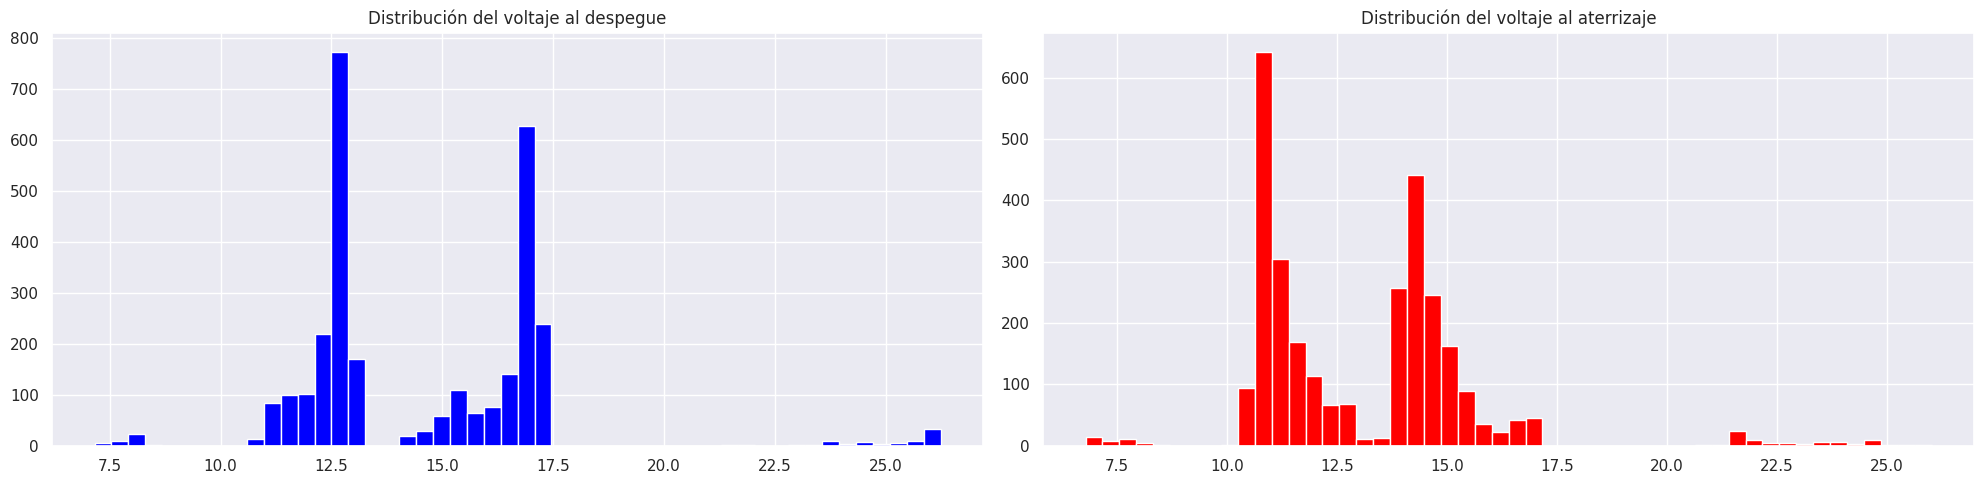

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.hist(mod_volts_df["Takeoff Volts"], bins=50, color="blue")
ax1.set_title("Distribución del voltaje al despegue")
ax2.hist(mod_volts_df["Landing Volts"], bins=50, color="red")
ax2.set_title("Distribución del voltaje al aterrizaje")

plt.tight_layout()
plt.show()

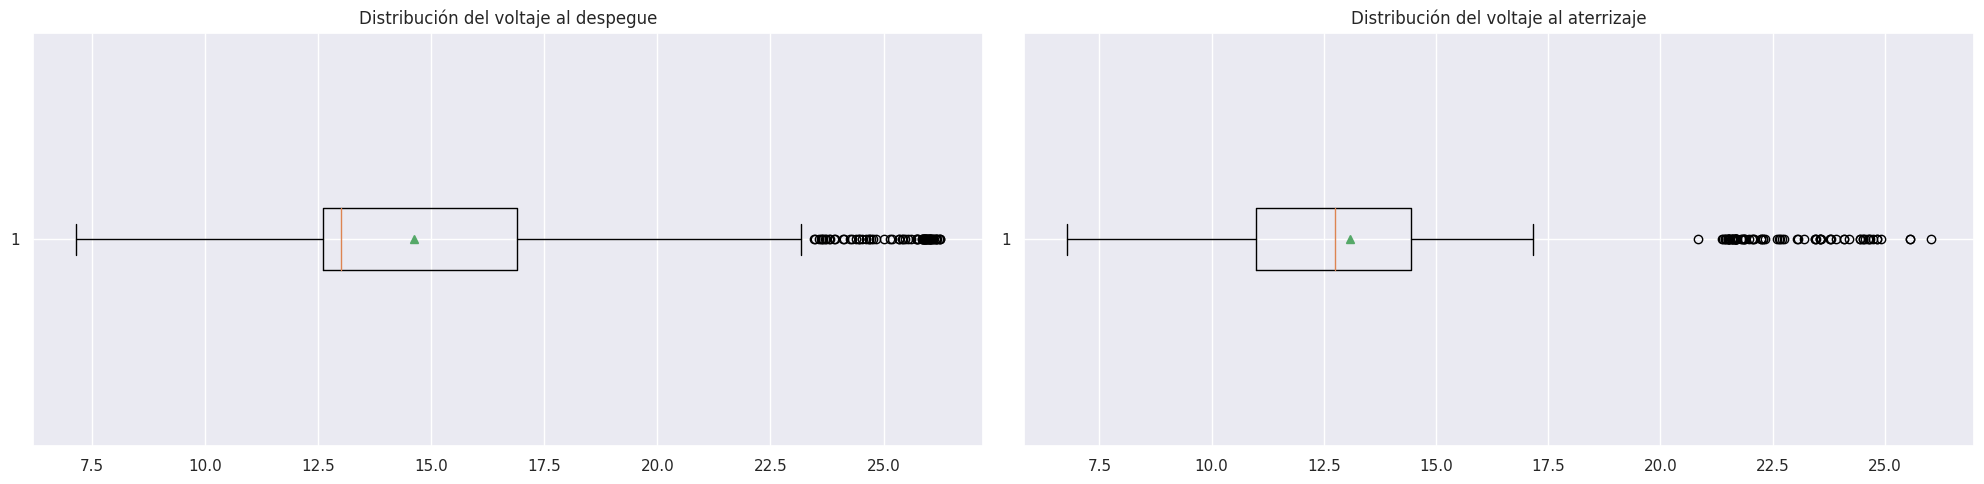

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.boxplot(mod_volts_df["Takeoff Volts"], showmeans=True, vert=False)
ax1.set_title("Distribución del voltaje al despegue")
ax2.boxplot(mod_volts_df["Landing Volts"], showmeans=True, vert=False)
ax2.set_title("Distribución del voltaje al aterrizaje")

plt.tight_layout()
plt.show()

Vemos que la distribución indicada por los histogramas y los diagramas de caja tiene perfecto sentido, ya que el voltaje de la batería depende del modelo del dron y se espera que en Xenital, al contar con diferentes equipos, los voltajes estén distribuidos como se observa. No se identifican datos atípicos en este caso.

####Max Altitude (Meters)
Esta variable hace referencia a la altitud máxima en metros alcanzada por el dron (relativa a la altitud de despegue).

In [ ]:
df["Max Altitude (Meters)"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    3000.000000
mean       70.915600
std       120.550842
min         0.000000
5%          0.000000
25%        13.475000
50%        51.200000
75%        82.200000
95%       224.305000
max      2450.700000
Name: Max Altitude (Meters), dtype: float64

[]

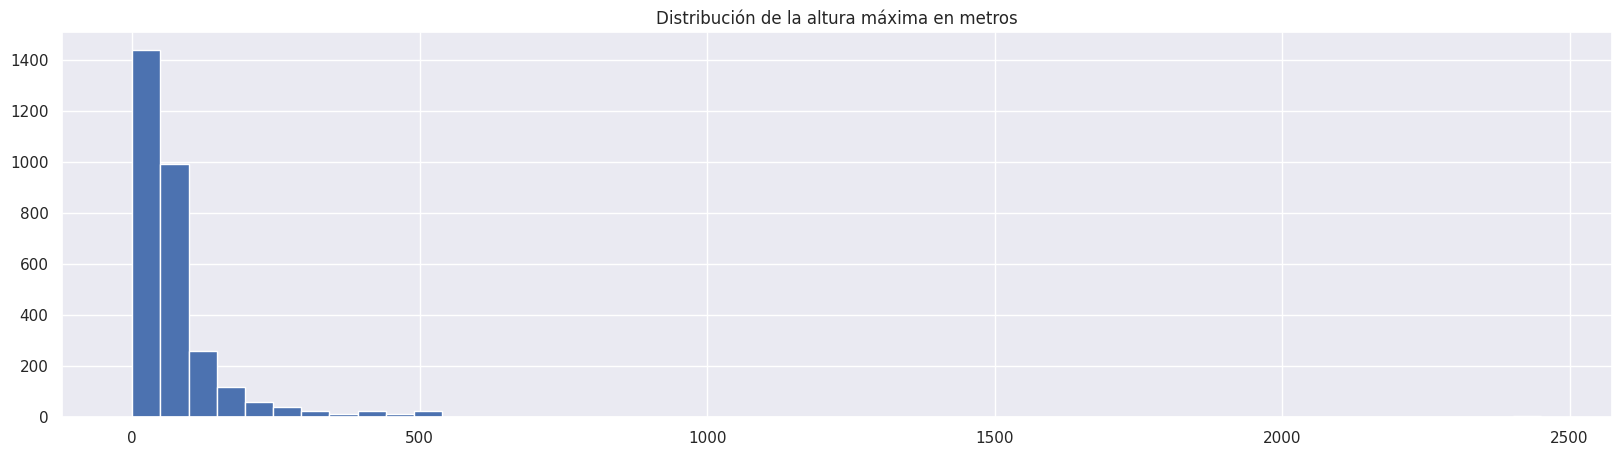

In [ ]:
plt.figure(figsize=(20, 5))
plt.hist(df["Max Altitude (Meters)"], bins=50)
plt.title("Distribución de la altura máxima en metros")
plt.plot()

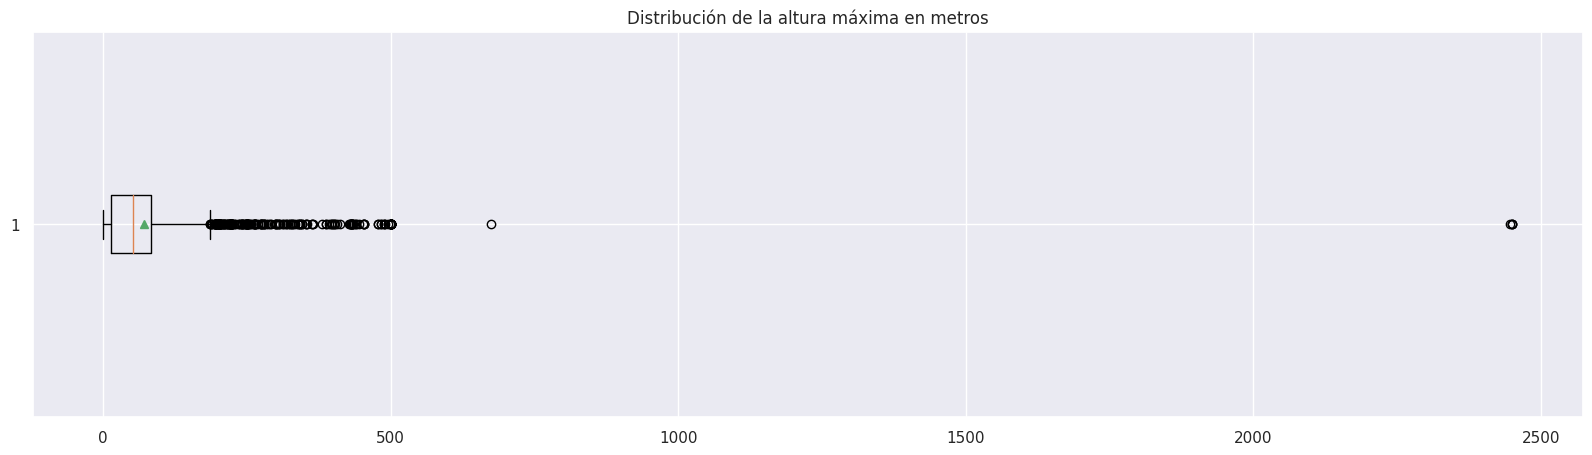

In [ ]:
plt.figure(figsize=(20, 5))
plt.boxplot(df["Max Altitude (Meters)"], showmeans=True, vert=False)
plt.title("Distribución de la altura máxima en metros")
plt.show()

Revisamos los registros que a simple vista parecen outliers:

In [ ]:
df[(df['Max Altitude (Meters)'] > 600)]

,Pilot-in-Command,Air Seconds,Above Sea Level (Meters),Drone Type,Takeoff Bat %,Takeoff mAh,Takeoff Volts,Landing Bat %,Landing mAh,Landing Volts,Max Altitude (Meters),Total Mileage (Kilometers)
112,Sebastian Uribe Sanabria,0,2555.7,Matrice 210 RTK,63,-1.0,23.724,49,-1.0,23.039,2446.7,0.5
116,Sebastian Uribe Sanabria,1,2555.5,Matrice 210 RTK,66,-1.0,23.802,66,-1.0,23.789,2449.7,0.0
117,Sebastian Uribe Sanabria,1125,2555.5,Matrice 210 RTK,68,-1.0,23.934,66,-1.0,23.790,2450.0,64.8
118,Sebastian Uribe Sanabria,1,0.0,Matrice 210 RTK,69,-1.0,23.916,68,-1.0,23.915,2450.7,0.0
393,Alejandro Becerra,1108,781.8,Phantom 4,98,5115.0,17.119,20,1044.0,14.405,674.1,2.3


Consultando con Xenital, estos valores son completamente válidos, ya que drones como el Matrice 210 RTK pueden alcanzar hasta 7,000m. Por otro lado el Phantom 4 puede alcanzar segun el fabricante alturas de hasta 500m, sin embargo el valor de 674m no parece muy lejano a su límite, por lo cual no se puede considerar tampoco como outlier.

####Total Mileage (Kilometers)
Esta variable hace referencia a la distancia total recorrida en vuelo (en kilómetros).

In [ ]:
df["Total Mileage (Kilometers)"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    3000.000000
mean        1.652333
std         2.876188
min         0.000000
5%          0.000000
25%         0.100000
50%         0.500000
75%         2.000000
95%         7.800000
max        64.800000
Name: Total Mileage (Kilometers), dtype: float64

[]

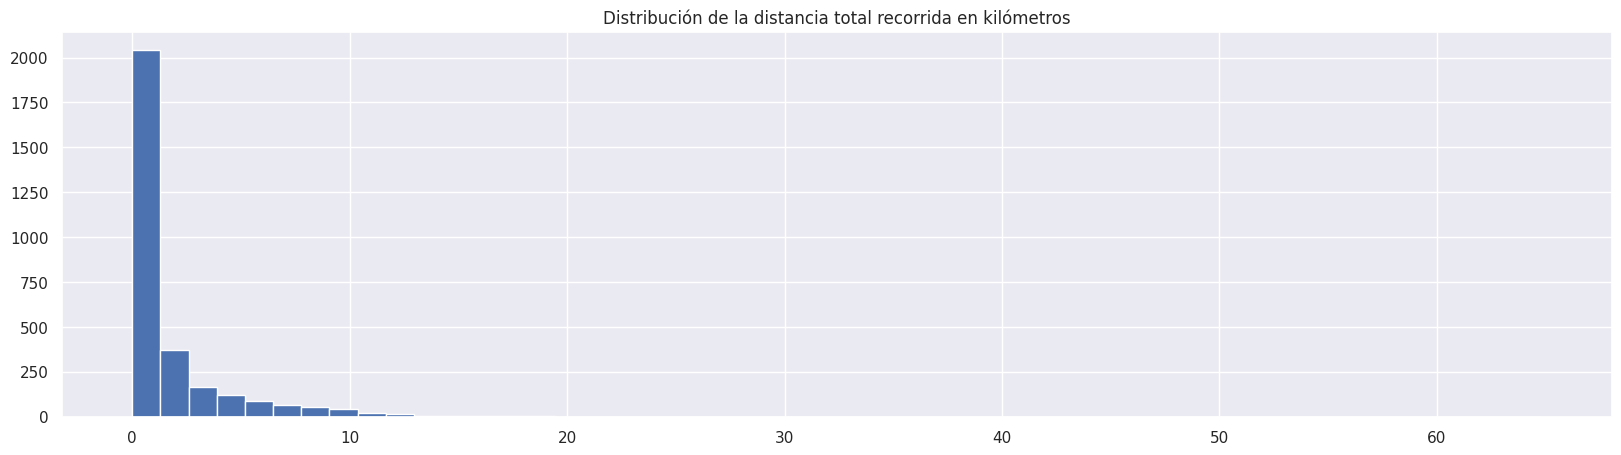

In [ ]:
plt.figure(figsize=(20, 5))
plt.hist(df["Total Mileage (Kilometers)"], bins=50)
plt.title("Distribución de la distancia total recorrida en kilómetros")
plt.plot()

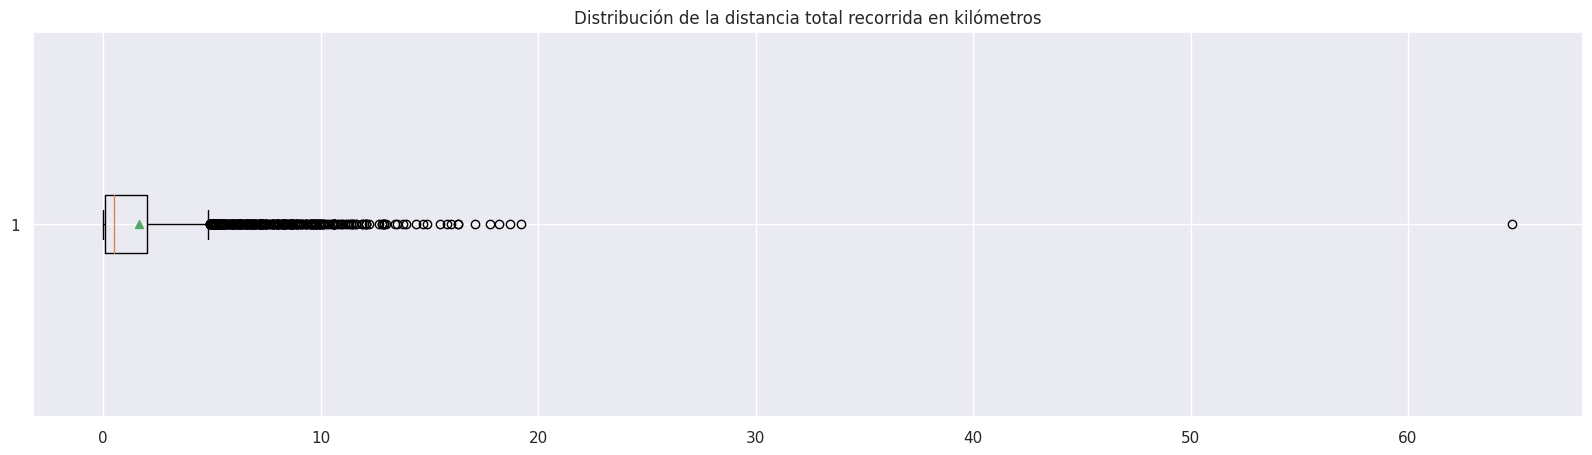

In [ ]:
plt.figure(figsize=(20, 5))
plt.boxplot(df["Total Mileage (Kilometers)"], showmeans=True, vert=False)
plt.title("Distribución de la distancia total recorrida en kilómetros")
plt.show()

Revisamos el dato que parece ser un outlier:

In [ ]:
df[(df['Total Mileage (Kilometers)'] > 20)]

,Pilot-in-Command,Air Seconds,Above Sea Level (Meters),Drone Type,Takeoff Bat %,Takeoff mAh,Takeoff Volts,Landing Bat %,Landing mAh,Landing Volts,Max Altitude (Meters),Total Mileage (Kilometers)
117,Sebastian Uribe Sanabria,1125,2555.5,Matrice 210 RTK,68,-1.0,23.934,66,-1.0,23.79,2450.0,64.8


Confirmando con Xenital, este dato es no conforme y probablemente se trata de un error de medición. Por lo cual se debe considerar eliminar.

###Columnas Categóricas

Las columnas categóricas del conjunto de datos son:

| Columna | Tipo de dato | Descripción | Valores posibles |
| :-: | :-: | :-: | :-: |
| Pilot-in-Command | Texto | Nombre del piloto a cargo del vuelo | Cadenas de caracteres (object) |

#####Pilot-in-Command
Esta variable hace referencia al nombre del piloto a cargo del vuelo.

Revisamos los valores de esta columna:

In [ ]:
df['Pilot-in-Command'].unique()

array(['Camilo Lopez', 'Alejandro Becerra', 'Sebastian Uribe Sanabria',
       'Karen Fonseca'], dtype=object)

Vemos que no existen errores de digitación y que existen 4 valores únicos para esta columna. A continuación revisamos la frecuencia de cada uno de estos valores.

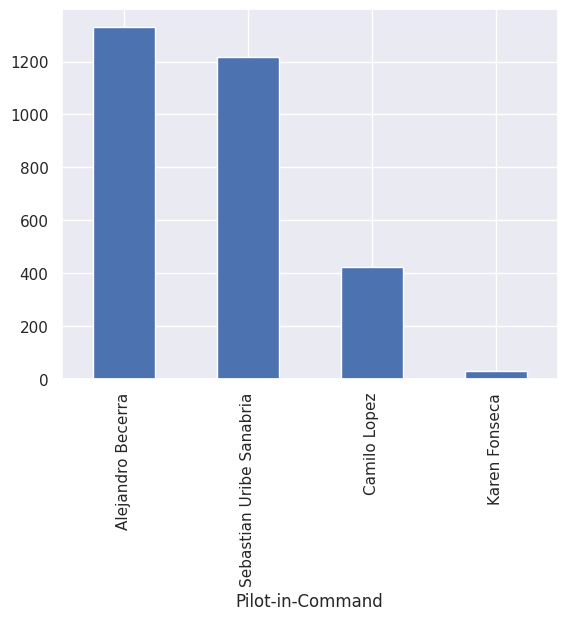

In [ ]:
df["Pilot-in-Command"].value_counts().plot(kind="bar")
plt.show()

Vemos que esta columna está completa, los valores son válidos y conformes.

#####Drone Type
Esta variable hace referencia al nombre del modelo del dron.

Revisamos los valores de esta columna:

In [ ]:
df['Drone Type'].unique()

array(['Mavic Air 2', 'Mini 2', 'Phantom 3 Advanced', 'Phantom 4',
       'Matrice 210 RTK V2', 'Matrice 210 RTK', 'Phantom 3 Professional',
       'Unknown Type', 'Mavic Mini', 'Mavic Pro', 'M600 Pro', 'Spark',
       'Phantom 4 Pro'], dtype=object)

Vemos que a simple vista no existen errores de digitación y todos los modelos corresponden a drones diferentes. Revisaremos ahora la frecuencia de estos valores.

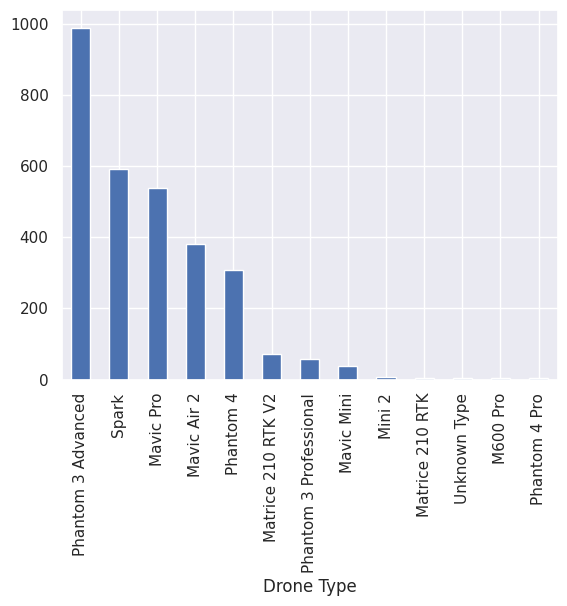

In [ ]:
df["Drone Type"].value_counts().plot(kind="bar")
plt.show()

Vemos que esta columna está completa, los valores son válidos y conformes.

####Análisis bivariado y multivariado

Empezamos realizando un gráfico de correlación entre las variables numéricas:

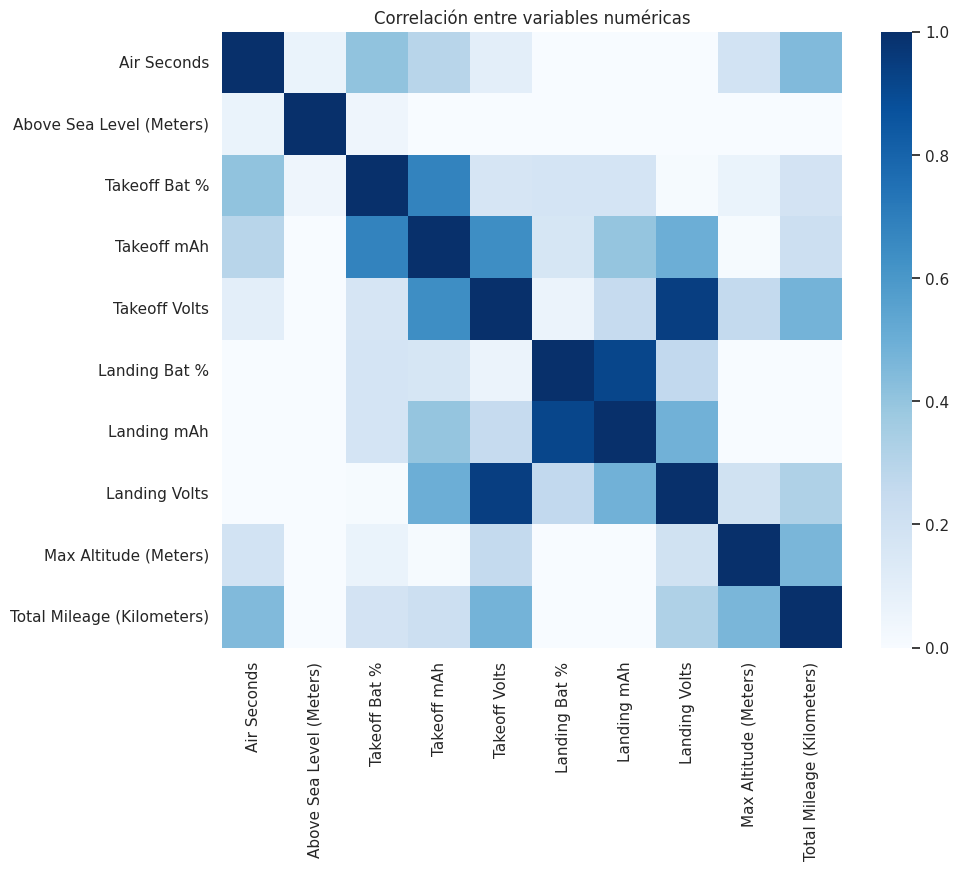

In [ ]:
num_df = df.drop(['Pilot-in-Command', 'Drone Type'], axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(
    num_df.corr(),
    vmin=0, vmax=1,
    cmap="Blues"
)
plt.title("Correlación entre variables numéricas")
plt.show()

Vemos que a simple vista no existen correlaciones muy interesantes de analizar, por esta razón se crean 3 columnas calculadas que serán la diferencia entre el % de batería, los mAh y los voltios a el despegue y al aterrizaje.

In [ ]:
df['Difference Bat %'] = df['Takeoff Bat %'] - df['Landing Bat %']
df['Difference mAh'] = df['Takeoff mAh'] - df['Landing mAh']
df['Difference Volts'] = df['Takeoff Volts'] - df['Landing Volts']

Volvemos a realizar el gráfico de correlación:

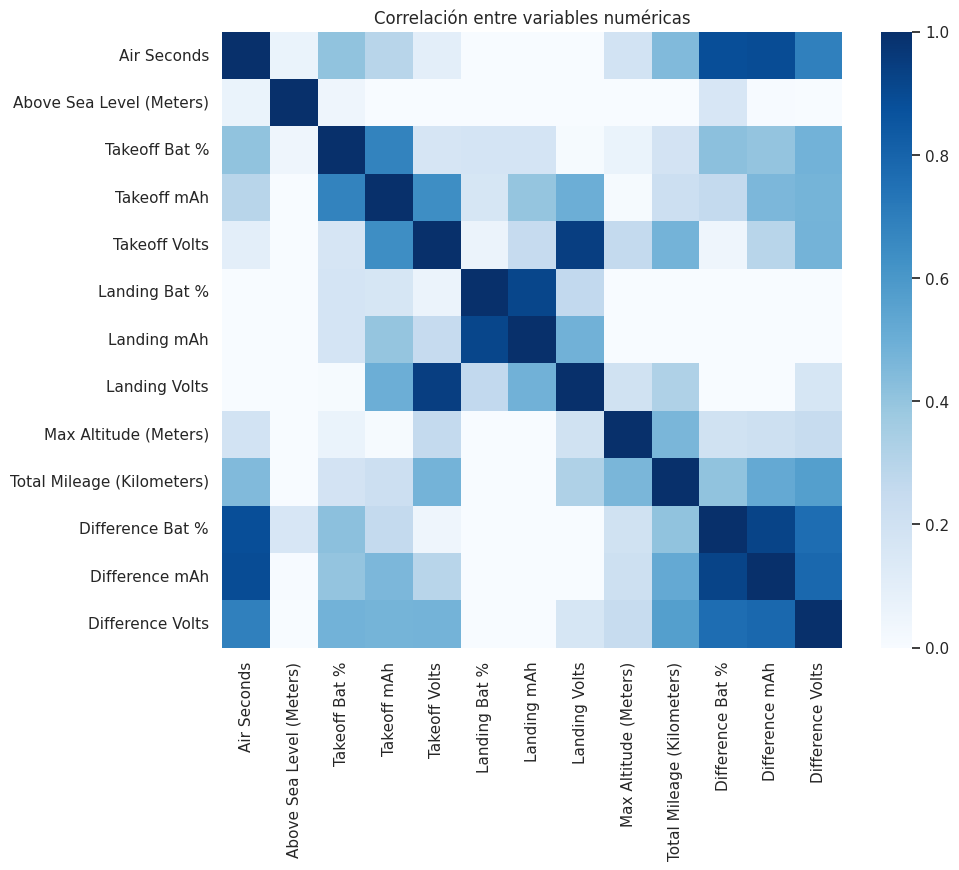

In [ ]:
num_df = df.drop(['Pilot-in-Command', 'Drone Type'], axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(
    num_df.corr(),
    vmin=0, vmax=1,
    cmap="Blues"
)
plt.title("Correlación entre variables numéricas")
plt.show()

Vemos que ahora si existen correlaciones significativas entre las variables recien creadas y variables como Air Seconds (que hace referencia al tiempo de vuelo en segundos. Ahondamos un poco más en estar relaciones con gráficos de dispersión:

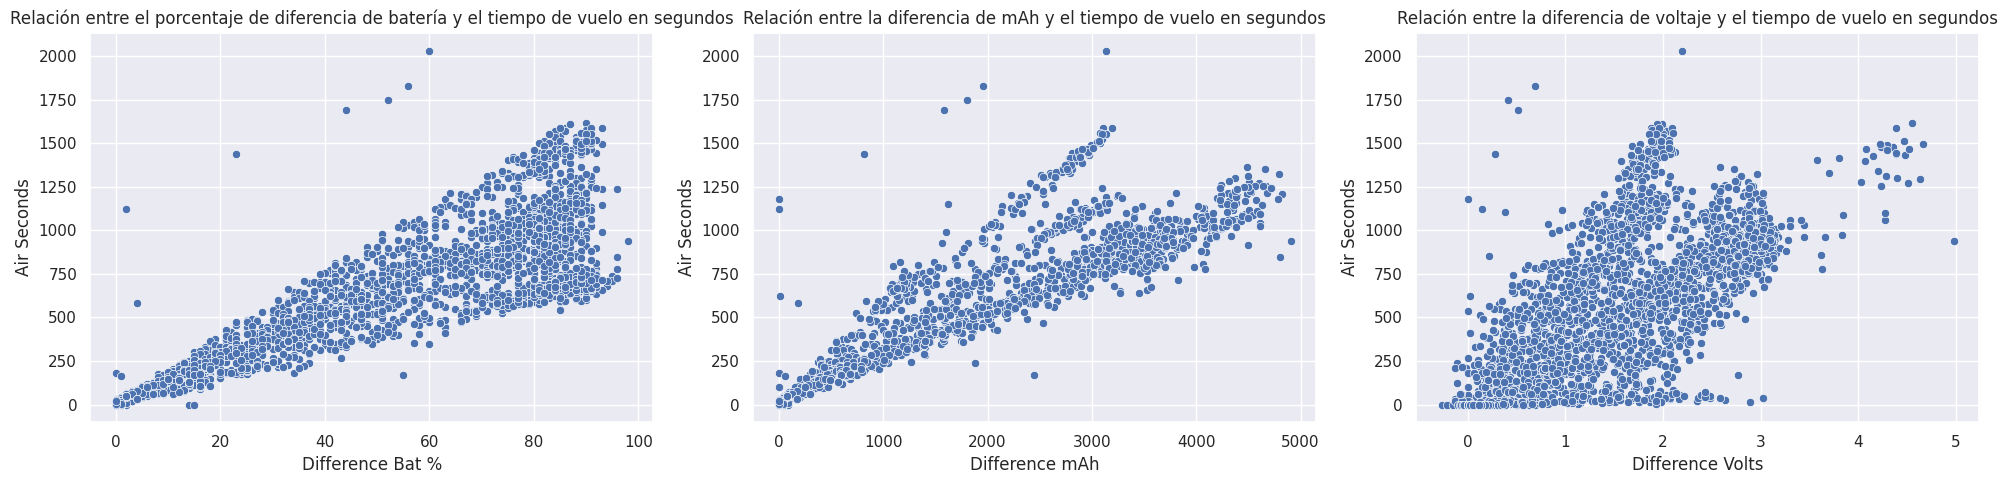

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(
    x=df["Difference Bat %"],
    y=df["Air Seconds"],
    ax=axes[0]
)
axes[0].set_title('Relación entre el porcentaje de diferencia de batería y el tiempo de vuelo en segundos')

sns.scatterplot(
    x=df["Difference mAh"],
    y=df["Air Seconds"],
    ax=axes[1]
)
axes[1].set_title('Relación entre la diferencia de mAh y el tiempo de vuelo en segundos')

sns.scatterplot(
    x=df["Difference Volts"],
    y=df["Air Seconds"],
    ax=axes[2]
)
axes[2].set_title('Relación entre la diferencia de voltaje y el tiempo de vuelo en segundos')


plt.tight_layout()
plt.show()

Vemos que estas relaciones son dignas de analizar, ya que una diferencia mayor entre las métricas de la batería al depegue y aterrizaje, se traduce usualmente en un tiempo de vuelo mayor.

In [ ]:
dronetype_frec_cumsum = df["Drone Type"].value_counts(normalize=True).cumsum()
pilot_frec_cumsum = df["Pilot-in-Command"].value_counts(normalize=True).cumsum()

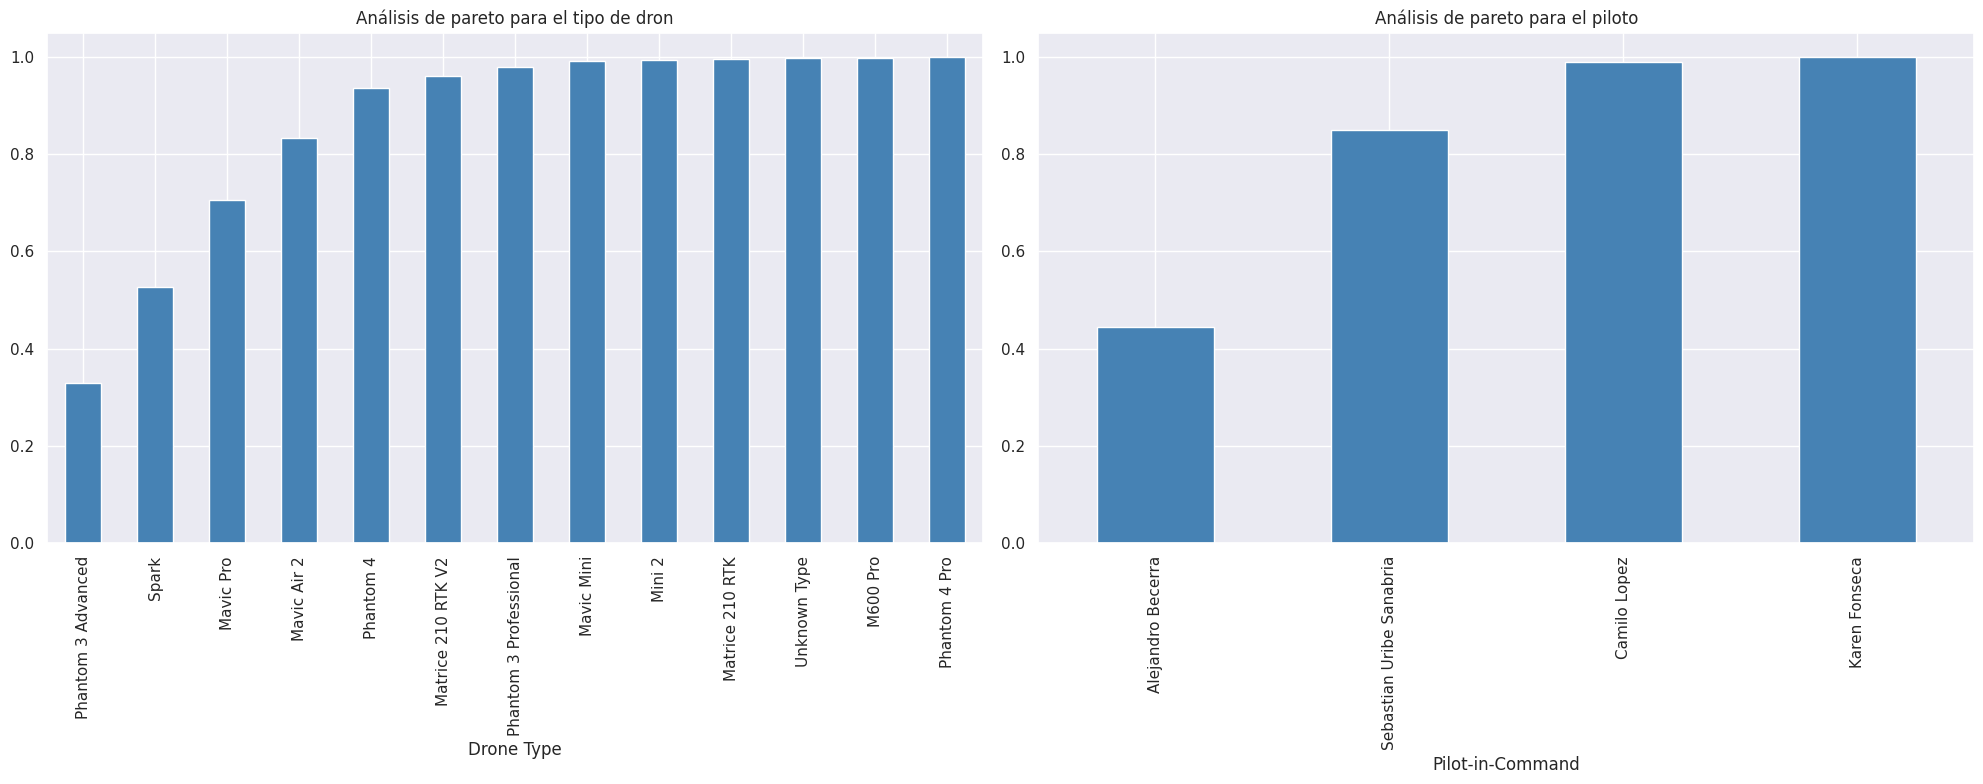

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

dronetype_frec_cumsum.plot(kind="bar", color="steelblue", ax=axes[0])
axes[0].set_title("Análisis de pareto para el tipo de dron")

pilot_frec_cumsum.plot(kind="bar", color="steelblue", ax=axes[1])
axes[1].set_title("Análisis de pareto para el piloto")

plt.tight_layout()
plt.show()

A partir de los gráficos de pareto, podemos estimar la significancia de cada uno de los valores de las variables categóricas.

###Calidad de datos e ideas de preparación

####Completitud
En cuanto a la completitud, retomamos el porcentaje de nulos en cada columna observado anteriormente:

In [ ]:
initial_df = df.drop(['Difference Bat %', 'Difference mAh', 'Difference Volts'], axis=1)
na_values = initial_df.isna().sum()/len(df)
print(na_values)

Pilot-in-Command              0.000000
Air Seconds                   0.000000
Above Sea Level (Meters)      0.000667
Drone Type                    0.000000
Takeoff Bat %                 0.000000
Takeoff mAh                   0.359000
Takeoff Volts                 0.020333
Landing Bat %                 0.000000
Landing mAh                   0.359000
Landing Volts                 0.020333
Max Altitude (Meters)         0.000000
Total Mileage (Kilometers)    0.000000
dtype: float64


<Axes: >

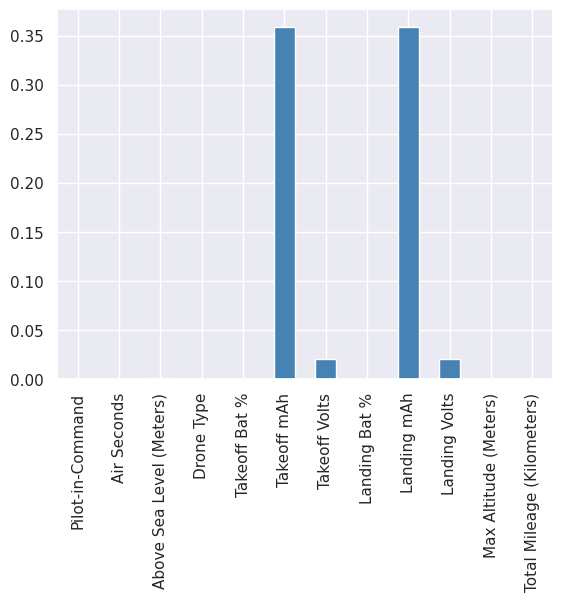

In [ ]:
na_values.plot(kind="bar", color="steelblue")

Vemos que las columnas con mayores problemas de completitud son Takeoff mAh y Landing mAh con porcentaje de nulos de 35.9% sin embargo también se comprobó que los registros que tienen nulos en una de estas columnas también lo tienen en las otras, así como también para Takeoff Volts y Landing Volts que a su vez cuentan con 2.03% de nulos. Finalmente Above Sea Level (Meters) cuenta con únicamente 2 registros nulos correspondientes al 0.0667% de los datos.

####Unicidad / Duplicidad

Para revisar la unicidad de los datos, volvemos a cargar el conjunto de datos original:

In [ ]:
df_uni = pd.read_csv('./Flight_Report_17.csv', encoding = "UTF-8", sep = ',')
# Se elimina las columnas 'Unnamed' que pueden surgir en ciertas ocasiones
df_uni = df_uni.loc[:, ~df_uni.columns.str.contains('^Unnamed')]

Ahora verificamos que no existan entradas con todas las variables iguales

In [ ]:
df_uni.duplicated().sum()

71

Vemos que existen 71 entradas completamentamente duplicadas que se deben eliminar en la limpieza de datos

### Insights de entendimiento de datos

* Existen problemas de completitud en las variables Takeoff y Landing mAh con un porcentaje de nulos de 35.9%. En menor medida, también existe un porcentaje de nulos de 2.03% para las columnas de Takeoff y Landing Volts.
* En cuanto a la duplicidad, existen 71 registros repetidos. Los cuales se van a eliminar en la limpieza de datos.
* 8.767% de las entradas del dataset corresponden a vuelos en los que el dron nunca despegó, es decir con tiempo de vuelo de 0 segundos.
* En las variables Takeoff mAh y Landing mAh existe un dato con valor máximo de 16715, consultando con Xenital, este valor no es posible para el modelo de dron que describen estas columnas.
* El valor mínimo de ambos Takeoff mAh y Landing mAh es de -1. Lo que no es confome con el diccionario de datos. Esto ocurre en exactamente 5 entradas.
* En la columna Total Mileage (Kilometers), existe un dato con valor de 64.8 km. Lo cual confirmando con Xenital, es un dato no válido.
* Las columnas categóricas no cuentan con ningún problema de validez.

## Limpieza y Preparación de datos

###Selección de características

####Debido a que el objetivo es "Predecir el nivel de consumo de la batería con el fin de identificar si el tipo de vuelo es de consumo bajo, medio o alto consumo para prever que se agoten." se necesitarán las siguientes variables:
#### Variable objetivo: Variable categórica calculada que determine el consumo de batería (bajo, medio, alto). Esta variable será calculada a partir de la variable Differece Bat % calculada anteriormente de la sigueiente Manera:
* Si Difference Bat % >= 66.67% => Consumo alto
* Si Difference Bat % > 33.33% ^ Difference Bat % < 66.67% => Consumo medio
* Si Difference Bat % <= 33.33% => Consumo bajo

#### Features:
* Pilot-in-Command
* Above Sea Level (Meters)
* Drone Type
* Takeoff Bat %
* Takeoff mAh
* Takeoff Volts
* Max Altitude (Meters)
* Total Mileage (Kilometers)

Se seleccionaron estas variables debido a que es posible conocer su valor a priori (antes del vuelo). Para el caso de Max Altitude (Altura máxima) y Total Mileage (Kilometers) el usuario debe realizar una estimación de cuanta altitud espera alcanzar en el vuelo así como la distancia total que espera recorrer.

De acuerdo con lo anterior, solo se mantedran en el dataset las variables relevantes para los análisis.

In [ ]:
df = df[['Pilot-in-Command', 'Above Sea Level (Meters)', 'Drone Type', 'Takeoff Bat %', 'Takeoff mAh', 'Takeoff Volts', 'Max Altitude (Meters)', 'Total Mileage (Kilometers)', 'Air Seconds', 'Difference Bat %']]

In [ ]:
df.head()

,Pilot-in-Command,Above Sea Level (Meters),Drone Type,Takeoff Bat %,Takeoff mAh,Takeoff Volts,Max Altitude (Meters),Total Mileage (Kilometers),Air Seconds,Difference Bat %
0,Camilo Lopez,2632.3,Mavic Air 2,87,2847.0,11.962,16.2,0.0,209,12
1,Camilo Lopez,2632.3,Mavic Air 2,100,3284.0,12.602,15.3,0.0,145,8
2,Camilo Lopez,2632.3,Mavic Air 2,97,3179.0,12.545,50.3,2.4,1332,85
3,Camilo Lopez,2632.2,Mavic Air 2,92,3024.0,12.380,66.8,2.4,1210,77
4,Camilo Lopez,2557.8,Mini 2,99,1958.0,8.629,66.4,1.7,1150,81


###Adición de nuevas características
Ahora, se añadira al dataset la variable objetivo para el caso 2, tendrá de nombre Battery Consumption y de valores: 1 (bajo), 2 (medio) y 3 (alto).

In [ ]:
df['Battery Consumption'] = df['Difference Bat %'].apply(lambda x: 3 if x >= 66.67 else (1 if x <= 33.33 else 2))

In [ ]:
df.head()

,Pilot-in-Command,Above Sea Level (Meters),Drone Type,Takeoff Bat %,Takeoff mAh,Takeoff Volts,Max Altitude (Meters),Total Mileage (Kilometers),Air Seconds,Difference Bat %,Battery Consumption
0,Camilo Lopez,2632.3,Mavic Air 2,87,2847.0,11.962,16.2,0.0,209,12,1
1,Camilo Lopez,2632.3,Mavic Air 2,100,3284.0,12.602,15.3,0.0,145,8,1
2,Camilo Lopez,2632.3,Mavic Air 2,97,3179.0,12.545,50.3,2.4,1332,85,3
3,Camilo Lopez,2632.2,Mavic Air 2,92,3024.0,12.380,66.8,2.4,1210,77,3
4,Camilo Lopez,2557.8,Mini 2,99,1958.0,8.629,66.4,1.7,1150,81,3


Ahora que ya tenemos la variable objetivo eliminaremos la variable Difference Bat %

In [ ]:
df = df[['Pilot-in-Command', 'Above Sea Level (Meters)', 'Drone Type', 'Takeoff Bat %', 'Takeoff mAh', 'Takeoff Volts', 'Max Altitude (Meters)', 'Total Mileage (Kilometers)', 'Air Seconds', 'Battery Consumption']]

In [ ]:
df.head()

,Pilot-in-Command,Above Sea Level (Meters),Drone Type,Takeoff Bat %,Takeoff mAh,Takeoff Volts,Max Altitude (Meters),Total Mileage (Kilometers),Air Seconds,Battery Consumption
0,Camilo Lopez,2632.3,Mavic Air 2,87,2847.0,11.962,16.2,0.0,209,1
1,Camilo Lopez,2632.3,Mavic Air 2,100,3284.0,12.602,15.3,0.0,145,1
2,Camilo Lopez,2632.3,Mavic Air 2,97,3179.0,12.545,50.3,2.4,1332,3
3,Camilo Lopez,2632.2,Mavic Air 2,92,3024.0,12.380,66.8,2.4,1210,3
4,Camilo Lopez,2557.8,Mini 2,99,1958.0,8.629,66.4,1.7,1150,3


### Análisis y corrección de valores nulos

In [ ]:
df.isna().sum()/len(df)

Pilot-in-Command              0.000000
Above Sea Level (Meters)      0.000667
Drone Type                    0.000000
Takeoff Bat %                 0.000000
Takeoff mAh                   0.359000
Takeoff Volts                 0.020333
Max Altitude (Meters)         0.000000
Total Mileage (Kilometers)    0.000000
Air Seconds                   0.000000
Battery Consumption           0.000000
dtype: float64

De acuerdo a lo anterior, podemos observar que hay 3 campos con valores nulos (Above Sea Level, Takeoff mAh y Takeoff Volts), de los cuales uno tiene un procentaje mayor al 30% (Takeoff mAh), para este caso es impensable realizar algún proceso de imputación dado que es un procentaje demasiado alto, por lo que se opta por eliminar esta columna.

In [ ]:
df = df[['Pilot-in-Command', 'Above Sea Level (Meters)', 'Drone Type', 'Takeoff Bat %', 'Takeoff Volts', 'Max Altitude (Meters)', 'Total Mileage (Kilometers)', 'Air Seconds', 'Battery Consumption']]

Ahora, para los 2 campos restantes con valores nulos, se realizará una imputación de datos

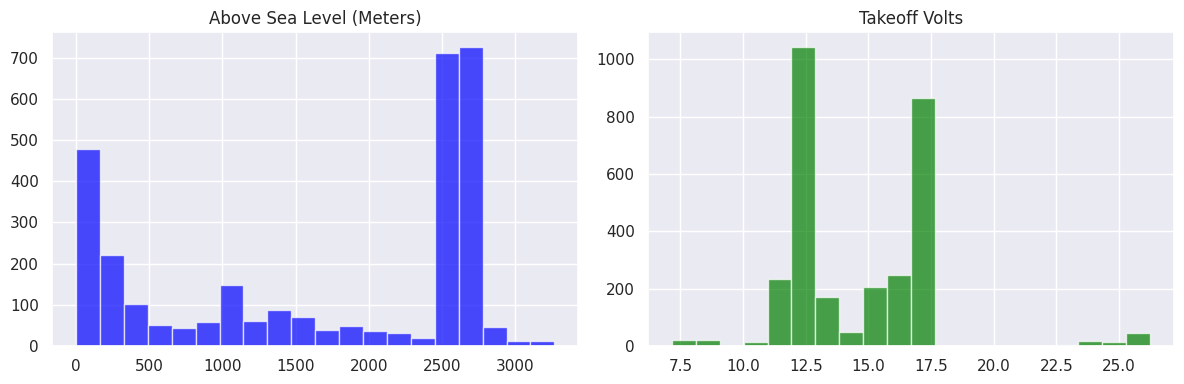

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].hist(df[['Above Sea Level (Meters)']], bins=20, color='blue', alpha=0.7)
axs[0].set_title('Above Sea Level (Meters)')
axs[1].hist(df[['Takeoff Volts']], bins=20, color='green', alpha=0.7)
axs[1].set_title('Takeoff Volts')
plt.tight_layout()
plt.show()

Dado que las distribuciones no son completamente normales, se hará la imputación de los datos por la mediana.

In [ ]:
df['Above Sea Level (Meters)'].fillna(df['Above Sea Level (Meters)'].median(), inplace=True)
df['Takeoff Volts'].fillna(df['Takeoff Volts'].median(), inplace=True)

In [ ]:
df.isna().sum()/len(df)

Pilot-in-Command              0.0
Above Sea Level (Meters)      0.0
Drone Type                    0.0
Takeoff Bat %                 0.0
Takeoff Volts                 0.0
Max Altitude (Meters)         0.0
Total Mileage (Kilometers)    0.0
Air Seconds                   0.0
Battery Consumption           0.0
dtype: float64

###Codificación de variables categóricas

In [ ]:
variables_categoricas = ['Pilot-in-Command', 'Drone Type']

In [ ]:
df_model = df.copy()
df_model.head()

,Pilot-in-Command,Above Sea Level (Meters),Drone Type,Takeoff Bat %,Takeoff Volts,Max Altitude (Meters),Total Mileage (Kilometers),Air Seconds,Battery Consumption
0,Camilo Lopez,2632.3,Mavic Air 2,87,11.962,16.2,0.0,209,1
1,Camilo Lopez,2632.3,Mavic Air 2,100,12.602,15.3,0.0,145,1
2,Camilo Lopez,2632.3,Mavic Air 2,97,12.545,50.3,2.4,1332,3
3,Camilo Lopez,2632.2,Mavic Air 2,92,12.380,66.8,2.4,1210,3
4,Camilo Lopez,2557.8,Mini 2,99,8.629,66.4,1.7,1150,3


In [ ]:
encoder = OneHotEncoder(sparse=False, drop='first')
encoder.fit(df_model[variables_categoricas])
encoded_data = encoder.transform(df_model[variables_categoricas])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(variables_categoricas))
df_model = pd.concat([df_model, encoded_df], axis=1)
df_model.drop(variables_categoricas, axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_model.head()

,Above Sea Level (Meters),Takeoff Bat %,Takeoff Volts,Max Altitude (Meters),Total Mileage (Kilometers),Air Seconds,Battery Consumption,Pilot-in-Command_Camilo Lopez,Pilot-in-Command_Karen Fonseca,Pilot-in-Command_Sebastian Uribe Sanabria,Drone Type_Matrice 210 RTK,Drone Type_Matrice 210 RTK V2,Drone Type_Mavic Air 2,Drone Type_Mavic Mini,Drone Type_Mavic Pro,Drone Type_Mini 2,Drone Type_Phantom 3 Advanced,Drone Type_Phantom 3 Professional,Drone Type_Phantom 4,Drone Type_Phantom 4 Pro,Drone Type_Spark,Drone Type_Unknown Type
0,2632.3,87,11.962,16.2,0.0,209,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2632.3,100,12.602,15.3,0.0,145,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2632.3,97,12.545,50.3,2.4,1332,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2632.2,92,12.380,66.8,2.4,1210,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2557.8,99,8.629,66.4,1.7,1150,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


###Creación de datasets
Generaremos un dataset con las variables necesarias para el modelamiento

In [ ]:
df_caso2 = df_model.copy()
df_caso2 = df_caso2.drop('Air Seconds', axis=1)
df_caso2.head()

,Above Sea Level (Meters),Takeoff Bat %,Takeoff Volts,Max Altitude (Meters),Total Mileage (Kilometers),Battery Consumption,Pilot-in-Command_Camilo Lopez,Pilot-in-Command_Karen Fonseca,Pilot-in-Command_Sebastian Uribe Sanabria,Drone Type_Matrice 210 RTK,Drone Type_Matrice 210 RTK V2,Drone Type_Mavic Air 2,Drone Type_Mavic Mini,Drone Type_Mavic Pro,Drone Type_Mini 2,Drone Type_Phantom 3 Advanced,Drone Type_Phantom 3 Professional,Drone Type_Phantom 4,Drone Type_Phantom 4 Pro,Drone Type_Spark,Drone Type_Unknown Type
0,2632.3,87,11.962,16.2,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2632.3,100,12.602,15.3,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2632.3,97,12.545,50.3,2.4,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2632.2,92,12.380,66.8,2.4,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2557.8,99,8.629,66.4,1.7,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


###Partición de los datos en X y Y

Primero partimos los datos para cada uno de los casos en X (features) y Y (variable a predecir).

In [ ]:
X_2 = df_caso2.drop(columns=['Battery Consumption'])
Y_2 = df_caso2['Battery Consumption']

###Separación de datos en entrenamiento, prueba y validación

Posteriormente realizamos la división 80% entrenamiento - 10% prueba - 10% validación asegurandonos que para el caso 2 la distribución de la variable objetivo se mantenga para los datasets de prueba, entrenamiento y validación (con el parámetro 'stratify')

In [ ]:
# Dividimos inicialmente en 80%-20%
X_train_2, X_temp_2, Y_train_2, Y_temp_2 = train_test_split(X_2, Y_2, test_size=0.2, random_state=42, stratify=Y_2)

In [ ]:
# Dividimos el 20% temp en 50% prueba - 50% validación (10%-10% del conjunto original)
X_test_2, X_val_2, Y_test_2, Y_val_2 = train_test_split(X_temp_2, Y_temp_2, test_size=0.5, random_state=42, stratify=Y_temp_2)

In [ ]:
X_train_2.shape, Y_train_2.shape

((2400, 20), (2400,))

In [ ]:
X_test_2.shape, Y_test_2.shape

((300, 20), (300,))

In [ ]:
X_val_2.shape, Y_val_2.shape

((300, 20), (300,))

###Normalización de los datos
Posterior a la partición normalizaremos nuestros datos con StandardScaler de scikit-learn, con el fin de escalar nuestros datos para que cuenten con una media de 0 y desviación estándar de 1. Es necesario hacerle fit al scaler solo con el conjunto de entrenamiento y usar este mismo scaler para transformar los datos de entrenamiento, prueba y validación

In [ ]:
scaler_2 = StandardScaler()

In [ ]:
scaler_2.fit(X_train_2)

StandardScaler()

In [ ]:
X_train_2_scaled = scaler_2.transform(X_train_2)
X_test_2_scaled = scaler_2.transform(X_test_2)
X_val_2_scaled = scaler_2.transform(X_val_2)

##Estrategia de validación y selección del modelo.
La normalización se realiza después de separar los datos en entrenamiento, prueba y validación para evitar fuga de información entre los conjuntos. Si normalizamos antes de la separación, estaríamos utilizando información del conjunto de prueba y validación para calcular la normalización, lo cual puede llevar a una evaluación sesgada del modelo. Separar primero y luego normalizar garantiza que cada conjunto se procese de manera independiente y objetiva, evitando la contaminación de información entre ellos.

###Verificación distribución de los conjuntos de entrenamiento, validación y prueba.

In [ ]:
mean_2 = np.mean(X_2, axis=0)
std_2 = np.std(X_2, axis=0)

mean_2_train = np.mean(X_train_2_scaled, axis=0)
std_2_train = np.std(X_train_2_scaled, axis=0)

mean_2_test = np.mean(X_test_2_scaled, axis=0)
std_2_test = np.std(X_test_2_scaled, axis=0)

mean_2_val = np.mean(X_val_2_scaled, axis=0)
std_2_val = np.std(X_val_2_scaled, axis=0)

print("Media y desviación estándar conjunto original:")
print("Media:", mean_2)
print("Desviación estándar:", std_2)

print("\nMedia y desviación estándar conjunto entrenamiento:")
print("Media:", mean_2_train)
print("Desviación estándar:", std_2_train)

print("\nMedia y desviación estándar conjunto prueba:")
print("Media:", mean_2_test)
print("Desviación estándar:", std_2_test)

print("\nMedia y desviación estándar conjunto validación:")
print("Media:", mean_2_val)
print("Desviación estándar:", std_2_val)

Media y desviación estándar conjunto original:
Media: Above Sea Level (Meters)                     1654.410000
Takeoff Bat %                                  87.614667
Takeoff Volts                                  14.587508
Max Altitude (Meters)                          70.915600
Total Mileage (Kilometers)                      1.652333
Pilot-in-Command_Camilo Lopez                   0.141000
Pilot-in-Command_Karen Fonseca                  0.009333
Pilot-in-Command_Sebastian Uribe Sanabria       0.406000
Drone Type_Matrice 210 RTK                      0.001667
Drone Type_Matrice 210 RTK V2                   0.024333
Drone Type_Mavic Air 2                          0.127000
Drone Type_Mavic Mini                           0.012333
Drone Type_Mavic Pro                            0.179333
Drone Type_Mini 2                               0.002000
Drone Type_Phantom 3 Advanced                   0.330000
Drone Type_Phantom 3 Professional               0.019000
Drone Type_Phantom 4              

Verificamos ahora que la división se haya hecho 80% Entrenamiento - 10% Prueba - 10% Validación

In [ ]:
total_samples_2 = X_2.shape[0]
train_samples_2 = X_train_2_scaled.shape[0]
test_samples_2 = X_test_2_scaled.shape[0]
val_samples_2 = X_val_2_scaled.shape[0]

# Calcular los porcentajes
train_percentage_2 = (train_samples_2 / total_samples_2) * 100
test_percentage_2 = (test_samples_2 / total_samples_2) * 100
val_percentage_2 = (val_samples_2 / total_samples_2) * 100

# Imprimir los porcentajes
print("Porcentaje de muestras en el conjunto de entrenamiento:", train_percentage_2, "%")
print("Porcentaje de muestras en el conjunto de prueba:", test_percentage_2, "%")
print("Porcentaje de muestras en el conjunto de validación:", val_percentage_2, "%")

Porcentaje de muestras en el conjunto de entrenamiento: 80.0 %
Porcentaje de muestras en el conjunto de prueba: 10.0 %
Porcentaje de muestras en el conjunto de validación: 10.0 %


Por último, verificamos que el stratify se haya aplicado correctamente, y que la distribución de la variable objetivo se haya mantenido para los 3 conjuntos respecto al original.

In [ ]:
# Calcular la proporción de clases en Y_2 original
clases_originales, counts_originales = np.unique(Y_2, return_counts=True)
proporciones_originales = dict(zip(clases_originales, counts_originales))

# Calcular la proporción de clases en Y_train_2
clases_train, counts_train = np.unique(Y_train_2, return_counts=True)
proporciones_train = dict(zip(clases_train, counts_train))

# Calcular la proporción de clases en Y_test_2
clases_test, counts_test = np.unique(Y_test_2, return_counts=True)
proporciones_test = dict(zip(clases_test, counts_test))

# Calcular la proporción de clases en Y_val_2
clases_val, counts_val = np.unique(Y_val_2, return_counts=True)
proporciones_val = dict(zip(clases_val, counts_val))

print("Proporciones de clases en Y_2 original:", proporciones_originales)
print("Proporciones de clases en Y_train_2:", proporciones_train)
print("Proporciones de clases en Y_test_2:", proporciones_test)
print("Proporciones de clases en Y_val_2:", proporciones_val)

Proporciones de clases en Y_2 original: {1: 1130, 2: 650, 3: 1220}
Proporciones de clases en Y_train_2: {1: 904, 2: 520, 3: 976}
Proporciones de clases en Y_test_2: {1: 113, 2: 65, 3: 122}
Proporciones de clases en Y_val_2: {1: 113, 2: 65, 3: 122}


In [ ]:
# Calcular la proporción de clases en porcentajes en Y_2 original
proporciones_originales = {clase: count / len(Y_2) * 100 for clase, count in zip(clases_originales, counts_originales)}

# Calcular la proporción de clases en porcentajes en Y_train_2
proporciones_train = {clase: count / len(Y_train_2) * 100 for clase, count in zip(clases_train, counts_train)}

# Calcular la proporción de clases en porcentajes en Y_test_2
proporciones_test = {clase: count / len(Y_test_2) * 100 for clase, count in zip(clases_test, counts_test)}

# Calcular la proporción de clases en porcentajes en Y_val_2
proporciones_val = {clase: count / len(Y_val_2) * 100 for clase, count in zip(clases_val, counts_val)}

print("Proporciones de clases en porcentaje en Y_2 original:", proporciones_originales)
print("Proporciones de clases en porcentaje en Y_train_2:", proporciones_train)
print("Proporciones de clases en porcentaje en Y_test_2:", proporciones_test)
print("Proporciones de clases en porcentaje en Y_val_2:", proporciones_val)

Proporciones de clases en porcentaje en Y_2 original: {1: 37.666666666666664, 2: 21.666666666666668, 3: 40.666666666666664}
Proporciones de clases en porcentaje en Y_train_2: {1: 37.666666666666664, 2: 21.666666666666668, 3: 40.666666666666664}
Proporciones de clases en porcentaje en Y_test_2: {1: 37.666666666666664, 2: 21.666666666666668, 3: 40.666666666666664}
Proporciones de clases en porcentaje en Y_val_2: {1: 37.666666666666664, 2: 21.666666666666668, 3: 40.666666666666664}


Vemos que se mantienen las proporciones de los valores de la variable objetivo para los conjuntos.

###Estrategia a utilizar

Se entrenarán varios modelos de clasificación y se utilizará GridSearch de Scikit-learn para encontrar los mejores hiperparámetros del modelo, esto con el conjunto de entrenamiento. Los modelos a probar serán:

* Clasificador Random Forrest
* Clasificador Gradient Boosting
* Clasificador Máquinas de Soporte Vectorial (SVM)
* Regresión Logística

Posteriormente se evaluarán los modelos con los hiperparámetros encontrados. Esto se realizará con el conjunto de prueba. A partir de las métricas encontradas se escogerá el mejor modelo. Este mejor modelo se validará con los datos del conjunto de validación, encontrando las métricas del mejor modelo encontrado y concluyendo.

##Construcción del modelo


Definimos los modelos e hiperparámetros a probar:

In [ ]:
models_2 = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'Regresión Logística': LogisticRegression()
}

parameters_2 = {
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Regresión Logística': {'C': [0.1, 1, 10]}
}

Aplicamos GridSearch para la búsqueda de hiperparámetros para cada modelo:

In [ ]:
best_models_2 = {}
for model_name, model in models_2.items():
    grid_search_2 = GridSearchCV(model, parameters_2[model_name], cv=5, n_jobs=-1)
    grid_search_2.fit(X_train_2_scaled, Y_train_2)
    best_models_2[model_name] = grid_search_2.best_estimator_
    print(f'Mejores parámetros para {model_name}: {grid_search_2.best_params_}')

Mejores parámetros para Random Forest: {'n_estimators': 200}
Mejores parámetros para Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 100}
Mejores parámetros para SVM: {'C': 10, 'kernel': 'rbf'}
Mejores parámetros para Regresión Logística: {'C': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ahora con los mejores parámetros, cálculamos las métricas de cada clasificador para el conjunto de prueba:

In [ ]:
for model_name, model in best_models_2.items():
    predictions = model.predict(X_test_2_scaled)
    accuracy = accuracy_score(Y_test_2, predictions)
    report = classification_report(Y_test_2, predictions)
    print(f'Métricas para {model_name}:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Reporte clasificación:')
    print(report)
    print('-' * 30)

Métricas para Random Forest:
Accuracy: 0.79
Reporte clasificación:
              precision    recall  f1-score   support

           1       0.87      0.87      0.87       113
           2       0.57      0.46      0.51        65
           3       0.81      0.89      0.85       122

    accuracy                           0.79       300
   macro avg       0.75      0.74      0.74       300
weighted avg       0.78      0.79      0.78       300

------------------------------
Métricas para Gradient Boosting:
Accuracy: 0.78
Reporte clasificación:
              precision    recall  f1-score   support

           1       0.88      0.85      0.86       113
           2       0.55      0.45      0.49        65
           3       0.78      0.89      0.83       122

    accuracy                           0.78       300
   macro avg       0.74      0.73      0.73       300
weighted avg       0.77      0.78      0.77       300

------------------------------
Métricas para SVM:
Accuracy: 0.70
Repo

### Análisis de resultados

#### Random Forest:
El modelo de Random Forest muestra un rendimiento sólido con una precisión del 79%. Ofrece buenos valores de precisión, recall y f1-score para todas las clases. Es especialmente bueno para clasificar la clase 1 (bajo consumo de batería) y la clase 3 (alto consumo de batería).

#### Gradient Boosting:
El modelo de Gradient Boosting tiene una precisión del 78%. Aunque tiene un recall relativamente bajo para la clase 2 (medio consumo de batería), ofrece resultados equilibrados para las demás clases.

#### SVM:
El modelo de SVM muestra una precisión del 70%. Tiene dificultades para clasificar la clase 2 (medio consumo de batería) con un recall bajo, lo que indica que este modelo tiende a pasar por alto los casos de medio consumo de batería.

#### Regresión Logística:
La Regresión Logística tiene la menor precisión con un 67%. Al igual que el SVM, tiene dificultades para clasificar la clase 2. La precisión y recall son bajos para esta clase.

En resumen, el modelo de Random Forest es el más adecuado para esta tarea de clasificación, ya que tiene la mejor precisión global y ofrece un buen equilibrio entre precisión, recall y f1-score para todas las clases. Proporciona las predicciones más confiables para determinar el nivel de consumo de batería del dron (bajo, medio o alto). Cabe resaltar que la predicción de la clase 2 (consumo medio) es la más problemática para todos los modelos, ya que en términos generales sus métricas son las menores para todos los modelos entrenados.

##Evaluación del modelo:
Se realizará la evaluación cualitativa y cuantitativa del mejor modelo encontrado (con sus mejores hiperparámetros) para cada caso.

#### Tipo de aprendizaje:
Supervisado
#### Tarea de aprendizaje:
Clasificación
#### Algoritmos probados:
* Clasificador Random Forrest
* Clasificador Gradient Boosting
* Clasificador Máquinas de Soporte Vectorial (SVM)
* Regresión Logística
#### Algoritmo con mejor rendimiento sobre el conjunto de prueba:
Clasificador Random Forrest

Accuracy: 0.79

Reporte clasificación:
              
              precision    recall  f1-score   support

           1       0.85      0.88      0.86       113
           2       0.58      0.48      0.53        65
           3       0.82      0.88      0.85       122

    accuracy                           0.79       300
    macro avg      0.75      0.74      0.75       300
    weighted avg   0.78      0.79      0.78       300

#### Mejores Parámetros para Clasificador Random Forest:
{'n_estimators': 100}

Procedemos a realizar la evaluación cuantitativa del modelo, encontrando las métricas de rendimiento para los conjuntos de prueba, entrenamiento y validación:

In [ ]:
# Creamos y entrenamos el Clasificador Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_2_scaled, Y_train_2)

RandomForestClassifier()

In [ ]:
predictions_test = random_forest.predict(X_test_2_scaled)
predictions_val = random_forest.predict(X_val_2_scaled)

In [ ]:
report_test = classification_report(Y_test_2, predictions_test, output_dict=True)
report_val = classification_report(Y_val_2, predictions_val, output_dict=True)

In [ ]:
test_metrics = {
    'Conjunto': 'Prueba',
    'Precision (weighted)': report_test['weighted avg']['precision'],
    'Recall (weighted)': report_test['weighted avg']['recall'],
    'F1-score (weighted)': report_test['weighted avg']['f1-score'],
}

val_metrics = {
    'Conjunto': 'Validación',
    'Precision (weighted)': report_val['weighted avg']['precision'],
    'Recall (weighted)': report_val['weighted avg']['recall'],
    'F1-score (weighted)': report_val['weighted avg']['f1-score'],
}

In [ ]:
weighted_metrics_df = pd.DataFrame([test_metrics, val_metrics])

In [ ]:
print(weighted_metrics_df)

     Conjunto  Precision (weighted)  Recall (weighted)  F1-score (weighted)
0      Prueba              0.776634           0.786667             0.779487
1  Validación              0.800653           0.810000             0.796943


Vemos las métricas (ponderadas) obtenidas para los conjuntos de prueba y validación. A continuación se muestra todo el reporte de clasificación para los sets de prueba y validación:

In [ ]:
print("Reporte de clasificación para el conjunto de prueba")
print(classification_report(Y_test_2, predictions_test))

Reporte de clasificación para el conjunto de prueba
              precision    recall  f1-score   support

           1       0.87      0.86      0.87       113
           2       0.55      0.45      0.49        65
           3       0.81      0.90      0.85       122

    accuracy                           0.79       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.78      0.79      0.78       300



In [ ]:
print("Reporte de clasificación para el conjunto de validación")
print(classification_report(Y_val_2, predictions_val))

Reporte de clasificación para el conjunto de validación
              precision    recall  f1-score   support

           1       0.92      0.88      0.90       113
           2       0.63      0.42      0.50        65
           3       0.79      0.96      0.86       122

    accuracy                           0.81       300
   macro avg       0.78      0.75      0.75       300
weighted avg       0.80      0.81      0.80       300



Presentamos ahora sus matrices de confusión:

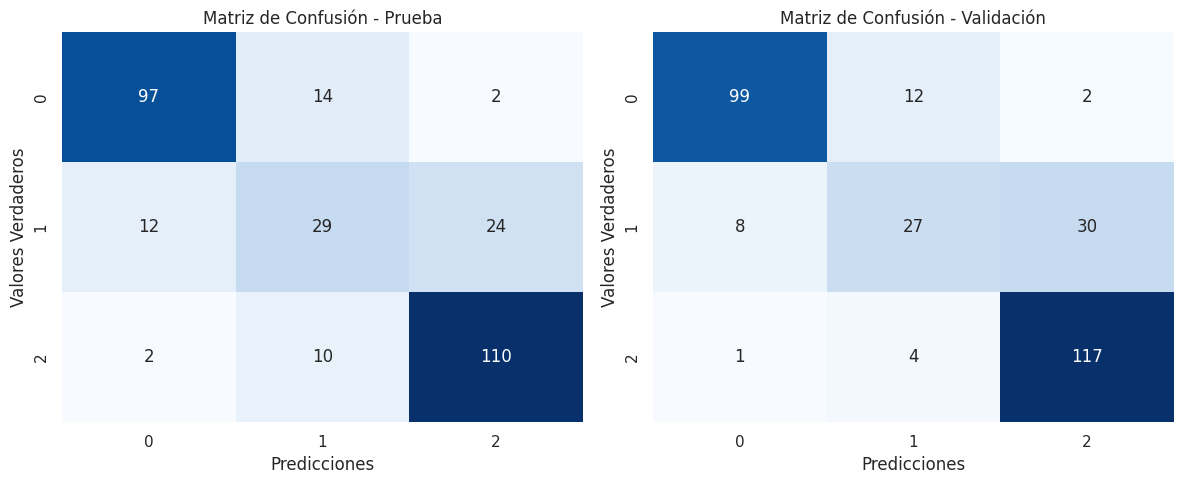

In [ ]:
# Calcular matrices de confusión para los conjuntos de prueba y validación
confusion_matrix_test = confusion_matrix(Y_test_2, predictions_test)
confusion_matrix_val = confusion_matrix(Y_val_2, predictions_val)

# Crear subplots para mostrar las matrices de confusión una al lado de la otra
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de confusión para el conjunto de prueba
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Matriz de Confusión - Prueba')
axes[0].set_xlabel('Predicciones')
axes[0].set_ylabel('Valores Verdaderos')

# Matriz de confusión para el conjunto de validación
sns.heatmap(confusion_matrix_val, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Matriz de Confusión - Validación')
axes[1].set_xlabel('Predicciones')
axes[1].set_ylabel('Valores Verdaderos')

# Mostrar las matrices de confusión
plt.tight_layout()
plt.show()

### Conclusión

El modelo de clasificación desarrollado utilizando Random Forest Classifier ha mostrado un buen rendimiento en términos de precisión, recall y f1 score para las clases de bajo y alto consumo de batería en el dron. Sin embargo, ha tenido dificultades para clasificar correctamente la clase de consumo medio. Esto indica que el modelo es especialmente efectivo para predecir los extremos del consumo de batería, pero tiene limitaciones en cuanto a la precisión para las situaciones intermedias.

En el conjunto de prueba, el modelo demostró una precisión aceptable del 80%. Aunque la precisión para la clase de consumo medio fue relativamente baja (57%), logró un buen equilibrio entre precisión y recall para las clases de bajo y alto consumo. En el conjunto de validación, el modelo también alcanzó una precisión del 80%, con una precisión del 93% para la clase de bajo consumo y una buena precisión del 78% para la clase de alto consumo. Sin embargo, la precisión para la clase de consumo medio fue notablemente más baja (60%).

Las matrices de confusión revelan que el modelo tiende a confundir las clases de consumo medio y bajo, así como las clases de consumo medio y alto. Esto sugiere que existen características compartidas entre estas clases que hacen que el modelo tenga dificultades para diferenciarlas con precisión.

En resumen, el modelo de Random Forest Classifier ha demostrado ser útil para clasificar los extremos del consumo de batería en el dron, pero requiere mejoras para hacer predicciones precisas en situaciones de consumo intermedio. Sería beneficioso investigar características adicionales o considerar técnicas avanzadas de ingeniería de características para mejorar la capacidad del modelo para discriminar entre estas categorías intermedias de consumo.